In [ ]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

In [ ]:
#import data from github
df_temp = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/train.csv')
test_df_temp = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv')


In [ ]:
df = df_temp.copy()
test_df = test_df_temp.copy()

In [ ]:
X = df.drop(['count'], axis=1)
Y = df[['count']]

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

#Data Exploration


Checking basic info about the data - null values and data type.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 765.5+ KB


We see that there aren't null values in the data

In [ ]:
X.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615


See how the bike renting count is devided

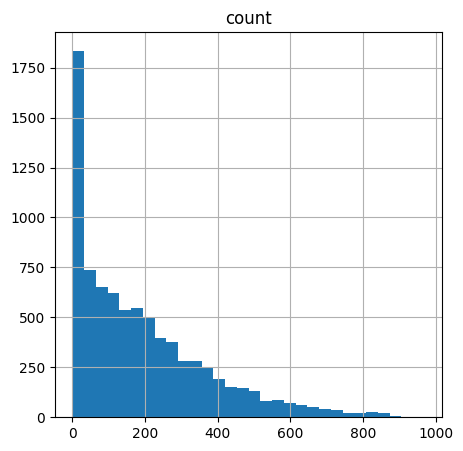

In [ ]:
Y.hist(bins =30, figsize = (5,5))
plt.show()

Correletion matrix


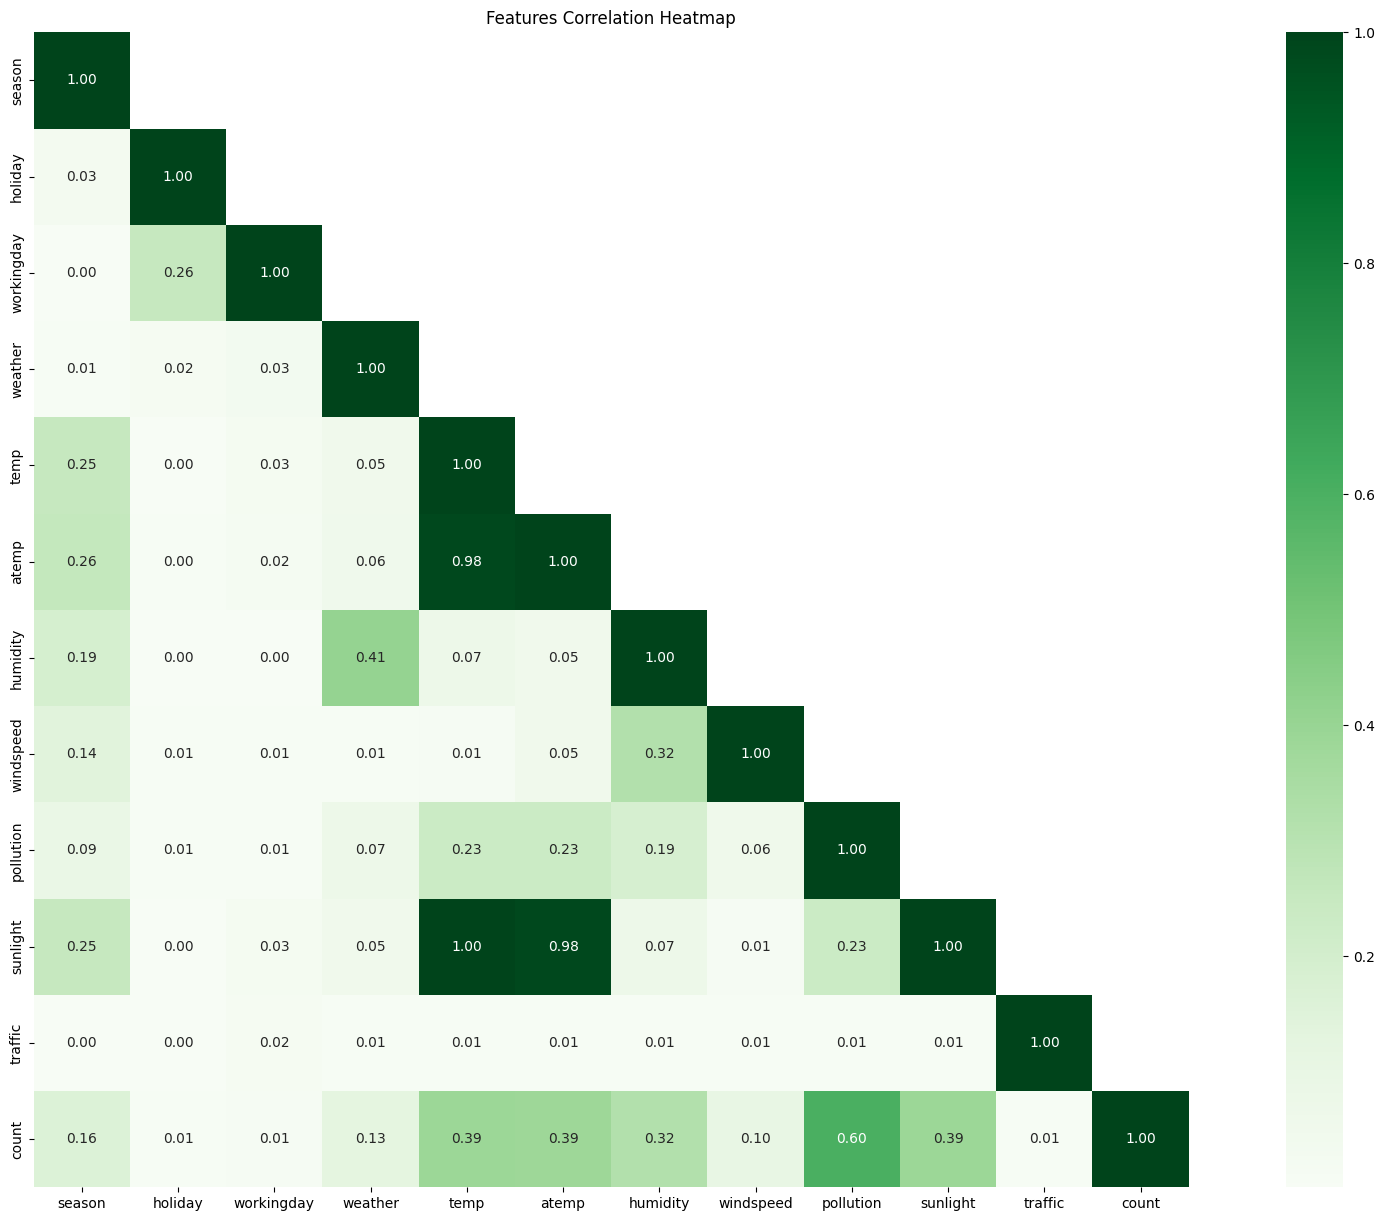

In [ ]:
corr_mat_original = df.drop(['datetime'], axis=1).corr().abs() # date cannot be correlated because it is not numeric
mask = np.array(corr_mat_original)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(25, 15))
plt.title('Features Correlation Heatmap')
sns.heatmap(corr_mat_original, mask=mask, annot=True, square = True, cmap="Greens", fmt='.2f')
plt.show()

Plot the corelation between high corelated features to the target variable - count if corelation is higher than 0.3

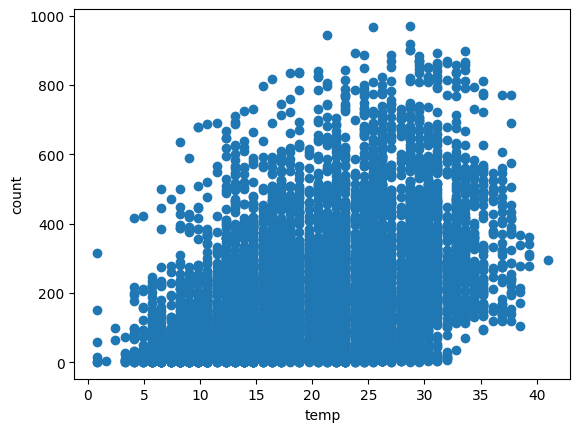

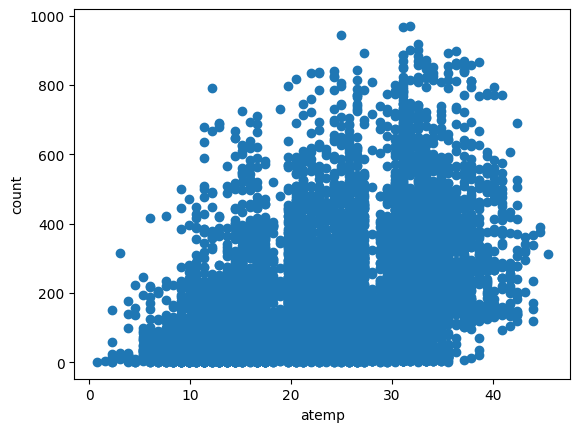

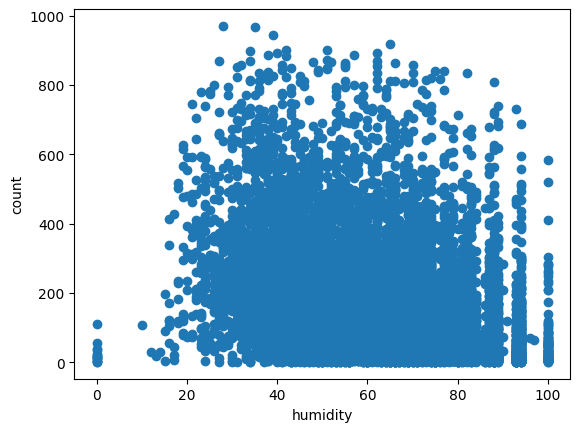

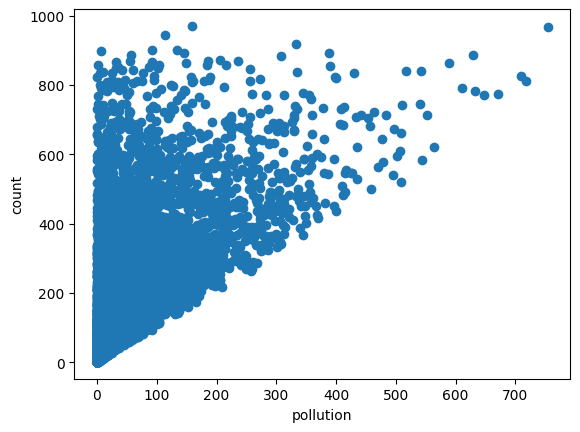

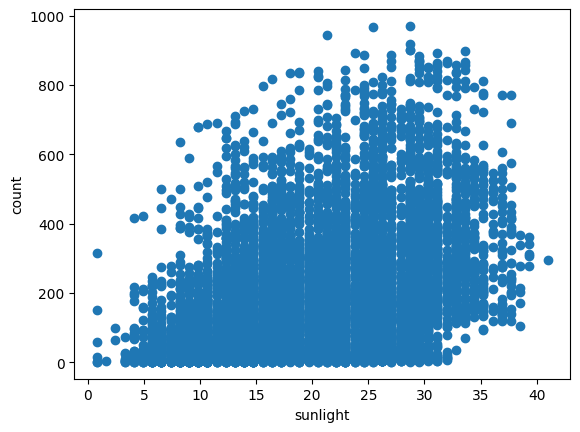

In [ ]:
corolated_features = corr_mat_original[corr_mat_original['count'] > 0.3].index
for feature in corolated_features:
    if feature == 'count':
        continue  # skip the target variable
    plt.scatter(df[feature], df['count'])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

We can see that the highest correlation is between 'count' and 'pollution'. this is make sense as most of the people would rent more bikes when there is less air pollution, also there is less air pollution when people rent more bikes.

Now we will try to find features that have only few unique values and might be catgorical, including boolean features

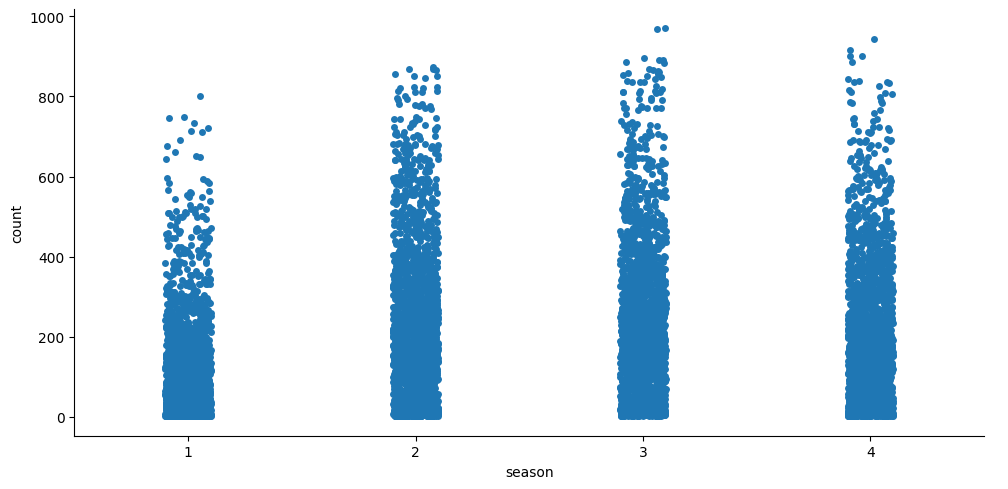

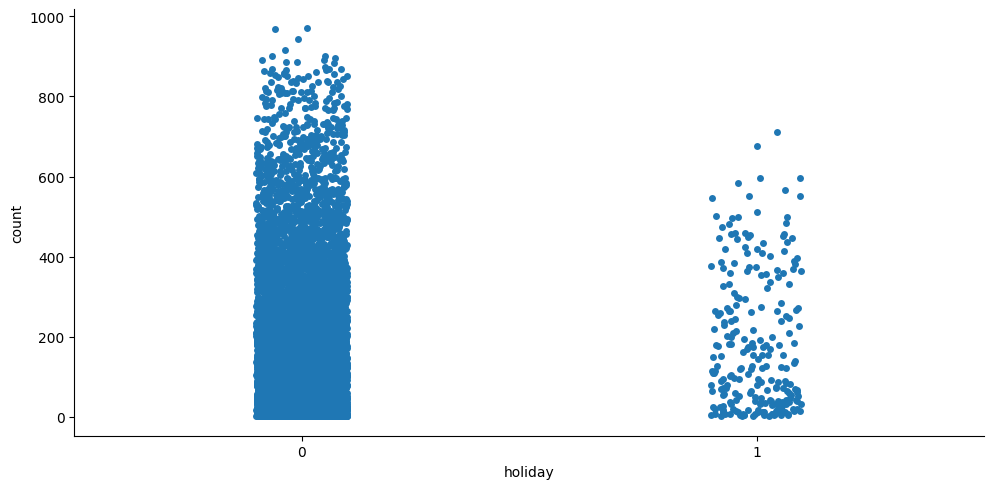

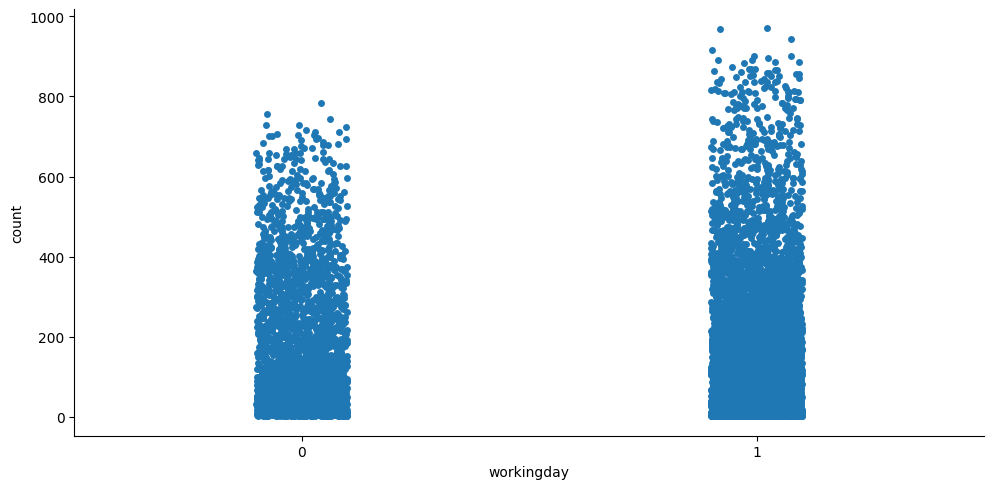

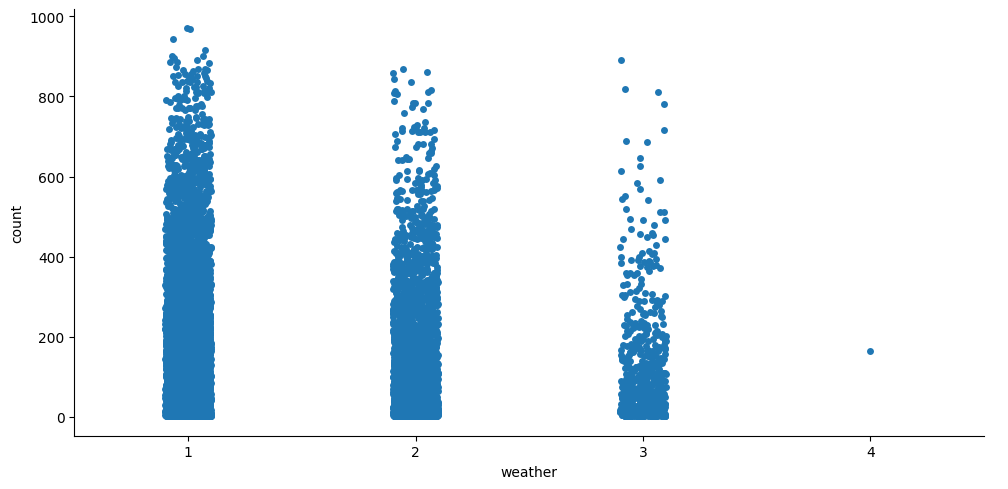

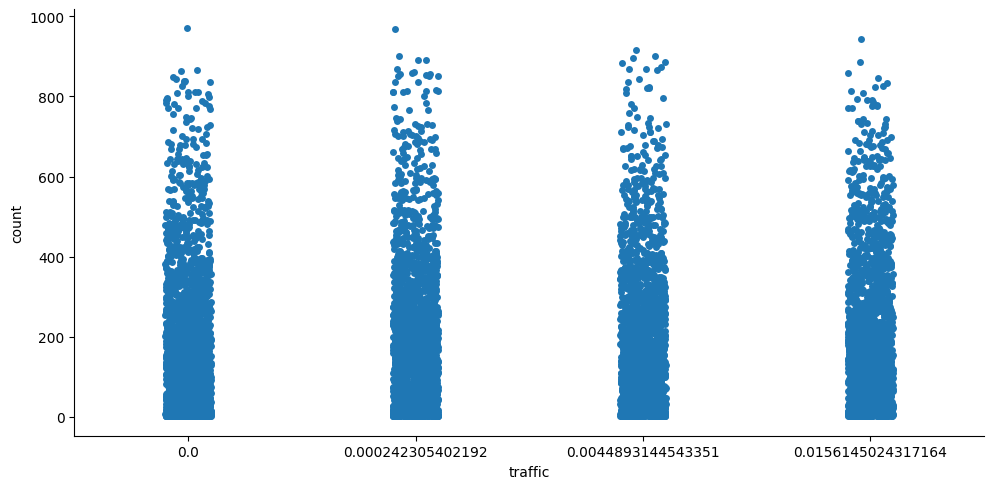

In [ ]:
def find_categorical_features(df):
    return [column  for column in df.columns if len(df[column].unique()) < 10]

categorical_features = find_categorical_features(X)

for feature in categorical_features:
    sns.catplot(x=feature, y='count', data=df, height=5, aspect=2)
    plt.show()

We already know that season, holiday, workingday and weather are categorical / boolian, but we can see from the results that "traffic" might also be a categorical feature since it only has 4 different unique values.

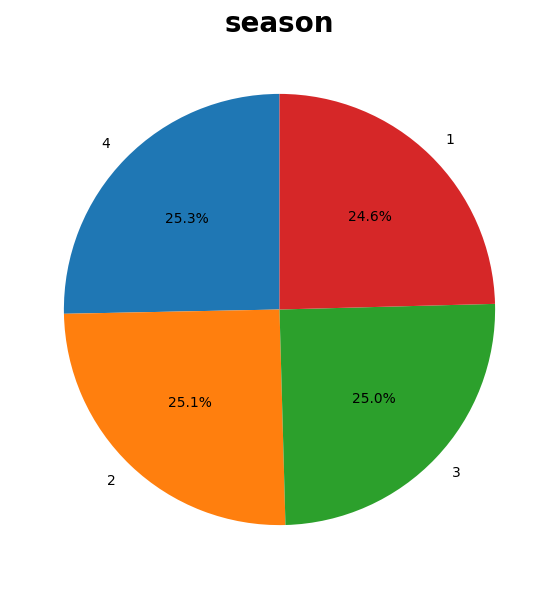

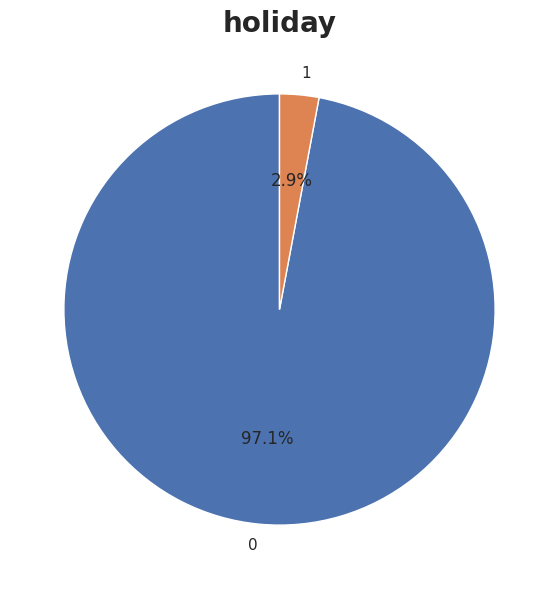

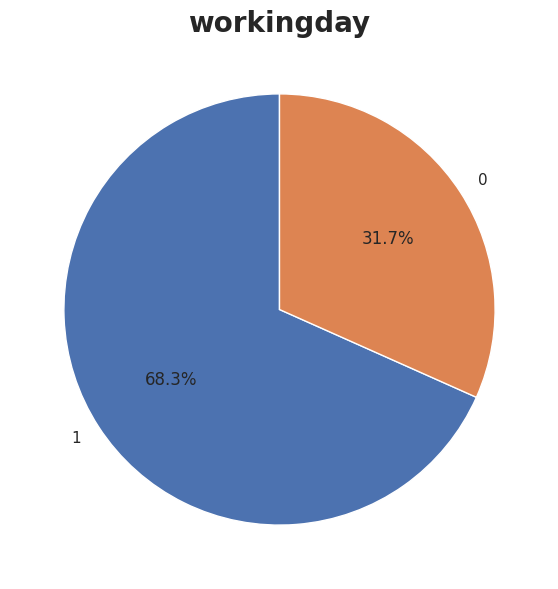

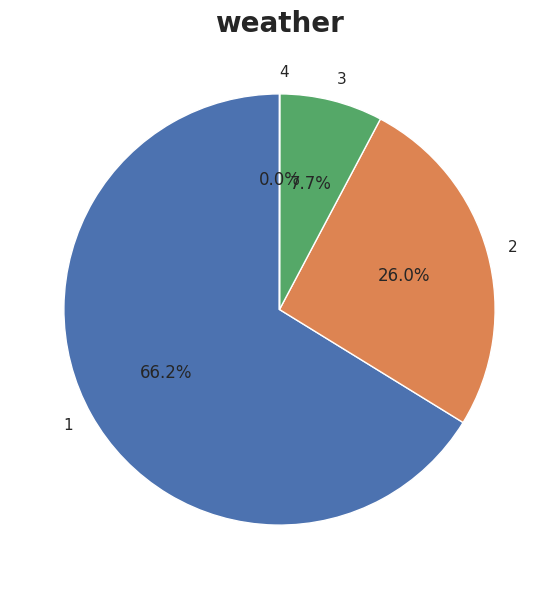

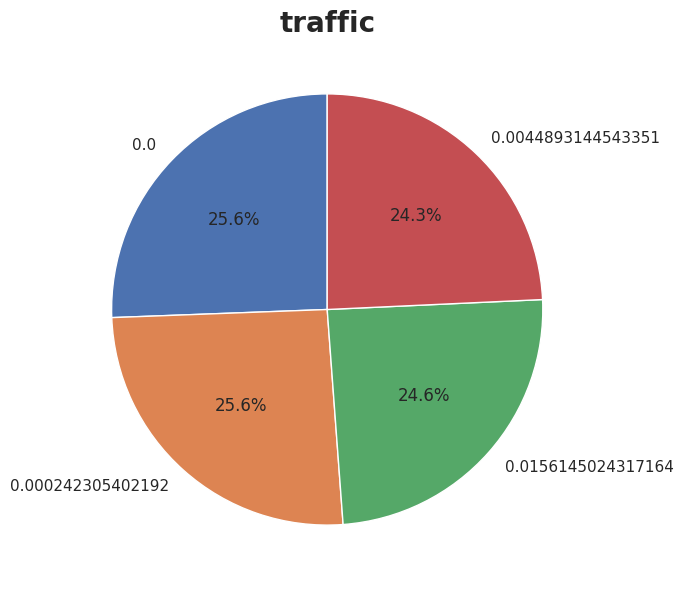

In [ ]:
# plot categorical features
for feature in categorical_features:
    plt.figure(figsize=(7, 7))
    X[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(feature, fontsize=20, fontweight='bold')
    plt.ylabel('')
    plt.show()
    sns.set(style="whitegrid")

We can see that only 2.9% of the data is representing holidays. Also - the "traffic" feature contains only 4 different values that are distributed almost equaly.


Numeric Features:

Feature     |     Unique Values
--------------------------------
datetime    |     8164
temp        |     49
atemp       |     60
humidity    |     87
windspeed   |     28
pollution   |     8164
sunlight    |     49


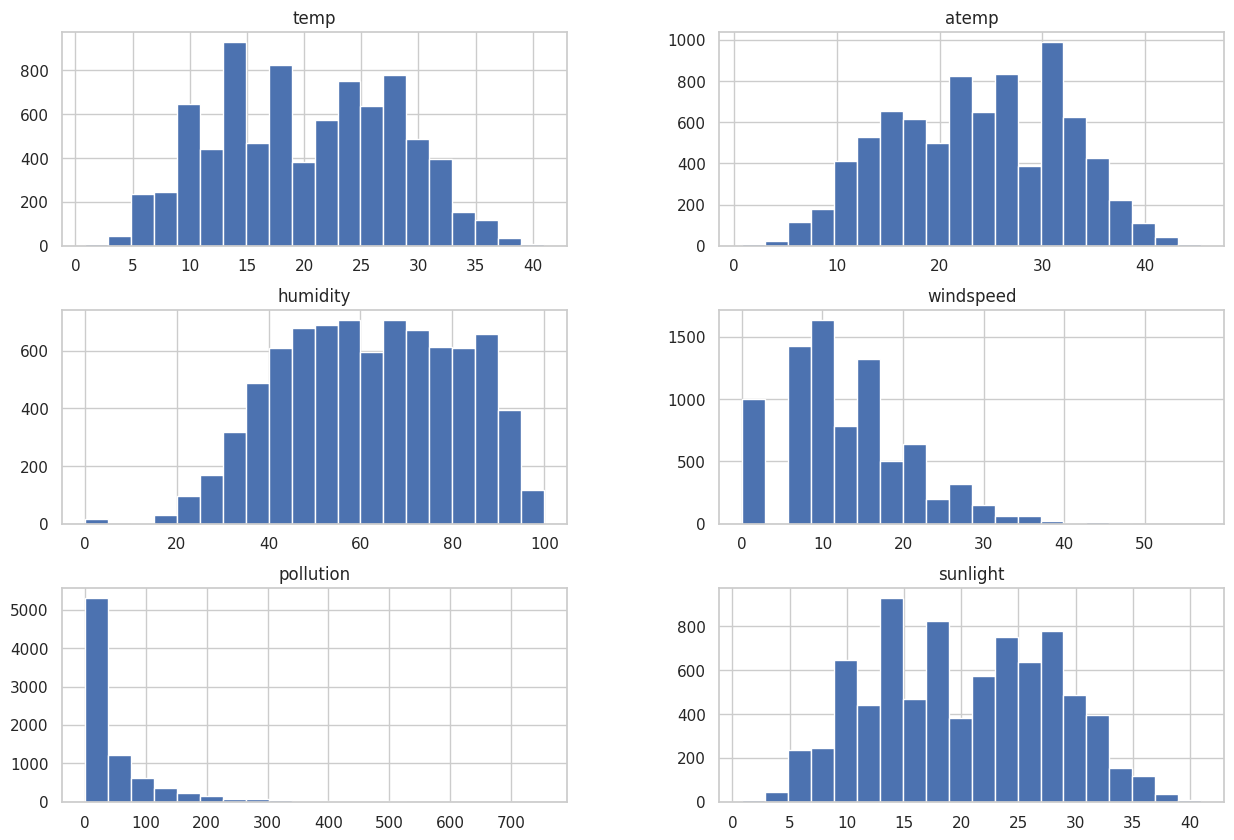

In [ ]:
# plot numeric features
numeric_features = X.drop(columns=categorical_features)
print("\nNumeric Features:\n")
print("Feature     |     Unique Values")
print("--------------------------------")
for col in numeric_features.columns:
  print(f"{col} {' ' * (10 - len(col))} |     {df[col].nunique()}")
numeric_features.hist(bins =20, figsize = (15,10))
plt.show()

1. sunlight and temp are distributed the same - as we saw in the correlation matrix their correlation is indeed 1.

2. It seems like most of the features distribute normally.

As part of the exploration we will divide the feature 'datetime' in order to see if we can learn something from it.

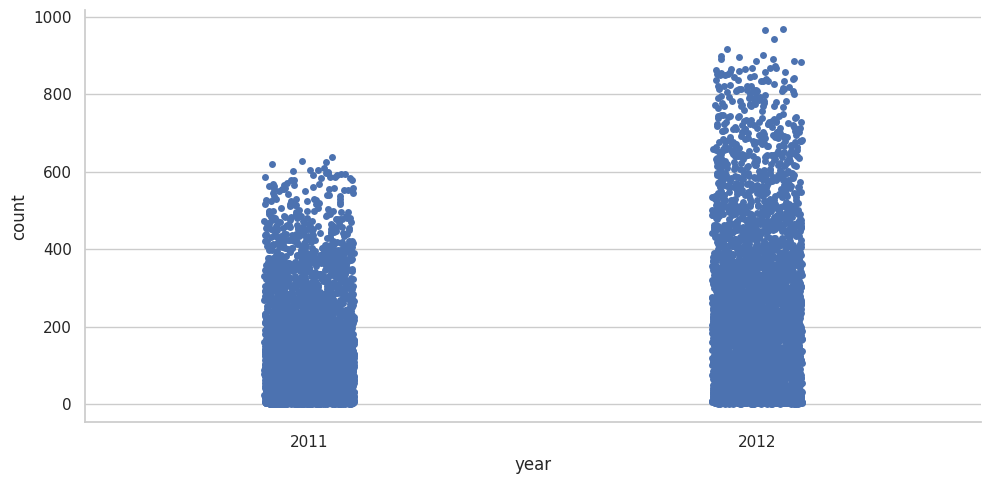

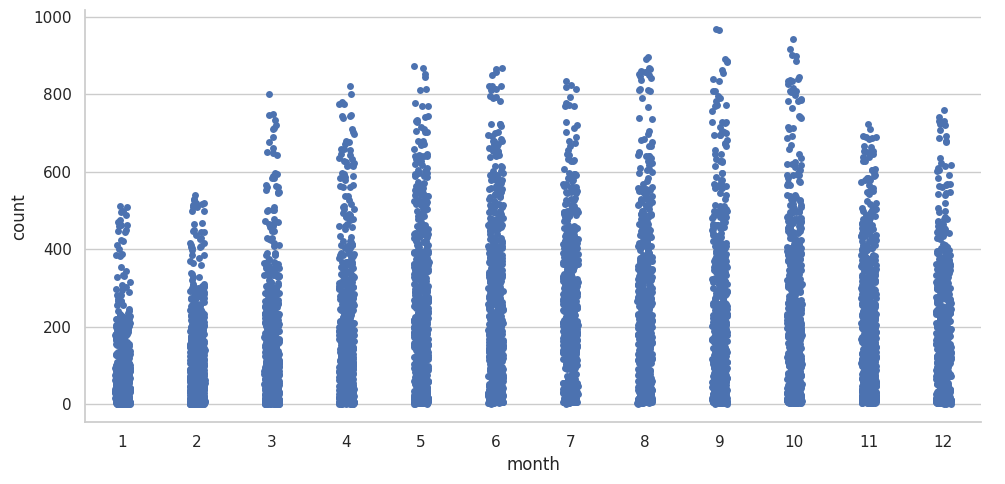

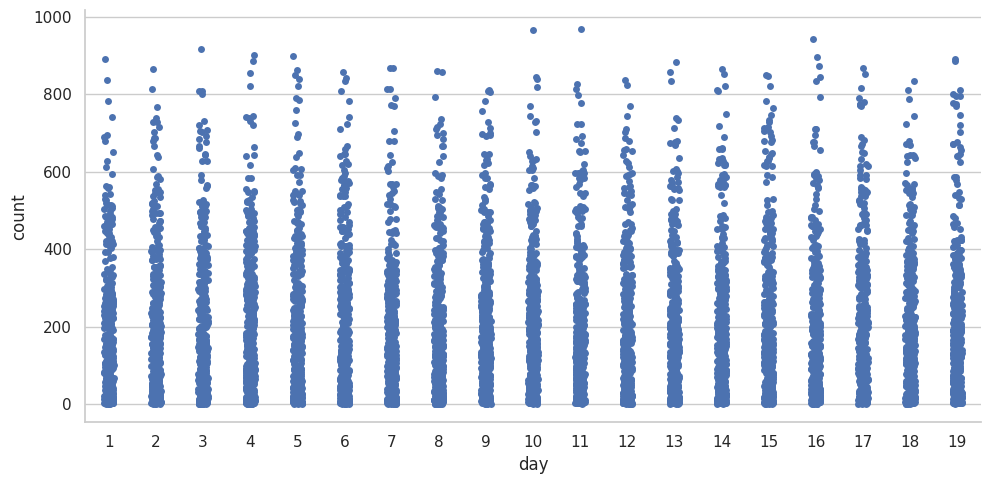

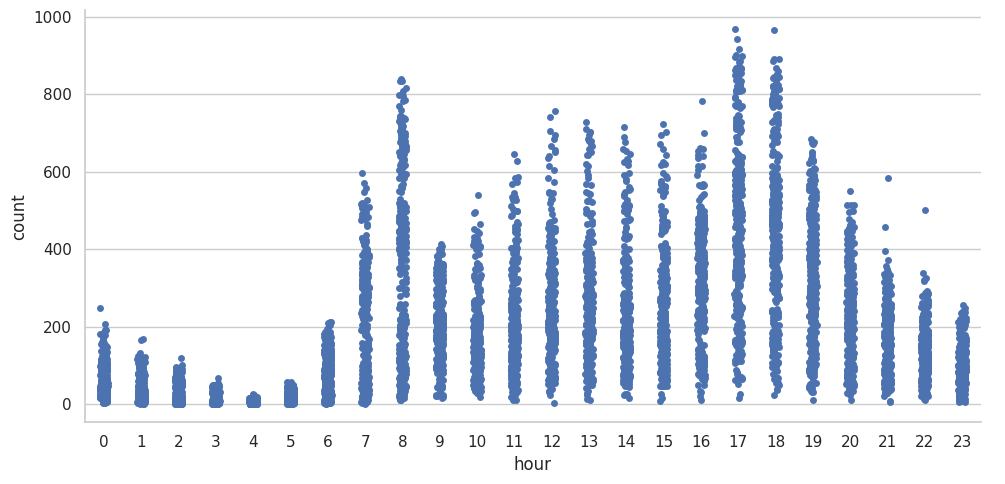

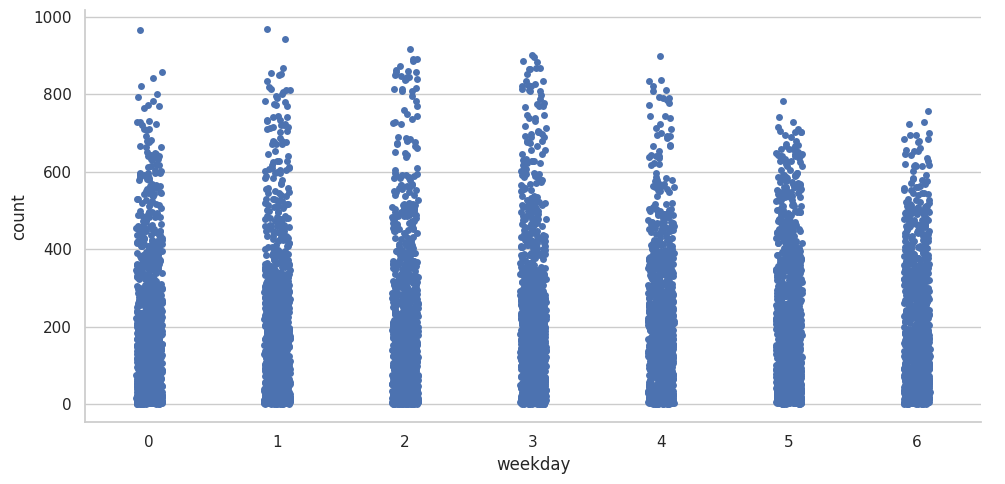

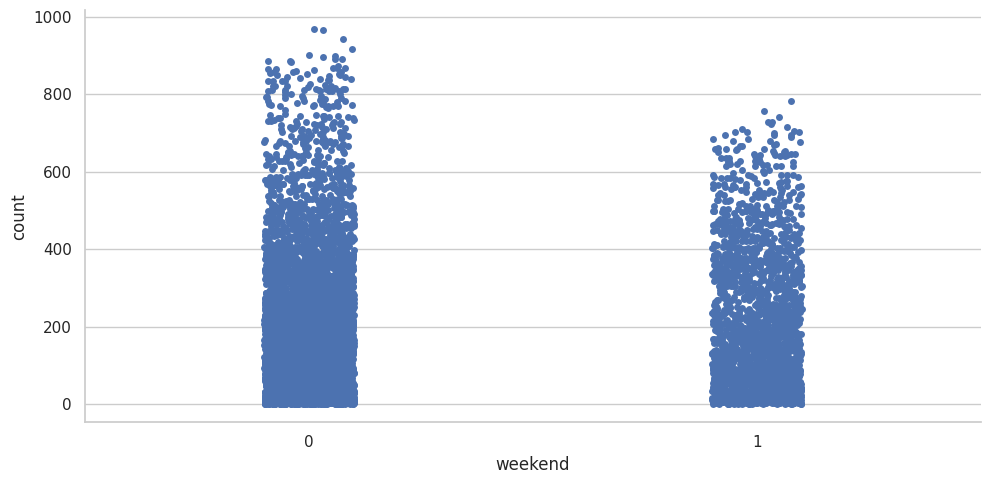

In [ ]:
df['datetime_obj'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime_obj'].dt.year
df['month'] = df['datetime_obj'].dt.month
df['day'] = df['datetime_obj'].dt.day
df['hour'] = df['datetime_obj'].dt.hour
df['weekday'] = df['datetime_obj'].dt.weekday
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# plot the new features
new_features = ('year', 'month', 'day', 'hour', 'weekday', 'weekend')
for feature in new_features:
    sns.catplot(x=feature, y='count', data=df, height=5, aspect=2)
    plt.show()


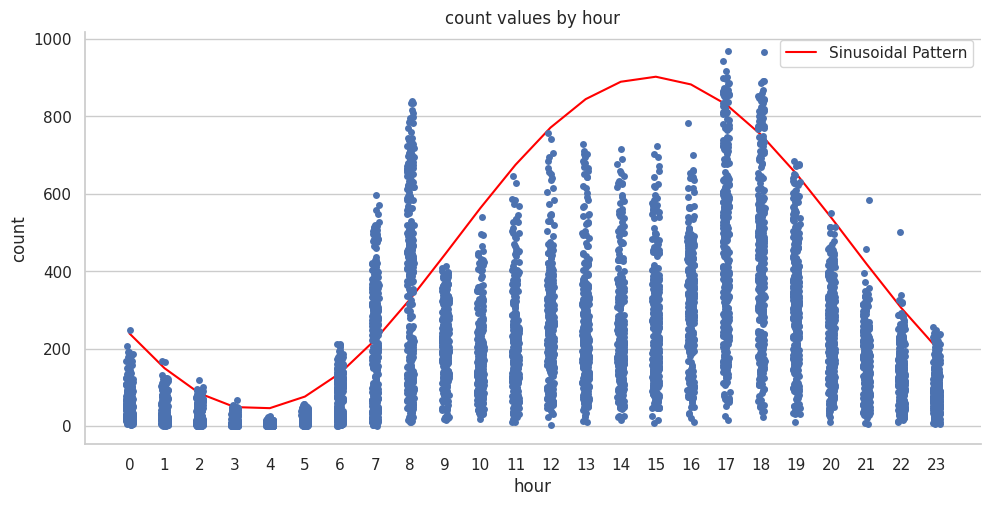

In [ ]:
hours = np.arange(0, 24)
sinusoidal_pattern = (np.sin(hours / 3.6 + 10) + 1.1) * 430  # Adjust the frequency and amplitude as needed

sns.catplot(x='hour', y='count', data=df, height=5, aspect=2)
plt.plot(hours, sinusoidal_pattern, color='red', label='Sinusoidal Pattern')

# Show the plot
plt.legend()
plt.title('count values by hour')
plt.show()

We suspected there was a cyclical pattern in our data pattern, so we transformed the data into two dimensions: hours and count. We recognize the sinus pattern of the count by hour, except for the 'rush hours' (around 7-8 or 17-18).

# What if there are interactions between the features?

We could suspect that there are features, that looking only at the effect of both of the features is just the sum of the effects and that they are independent of each other. But that might not be the case! for example, we would suspect that during a holiday, certain features would effect the renting of bikes differently than in non holidays, or that a clearer day during the winter would have a stronger effect than a clearer day in the summer.

We will take a look into the interactions, by looking at correlation matrices and how the "count" row is changing compared to the original corr matrix where we didn't keep it in mind.

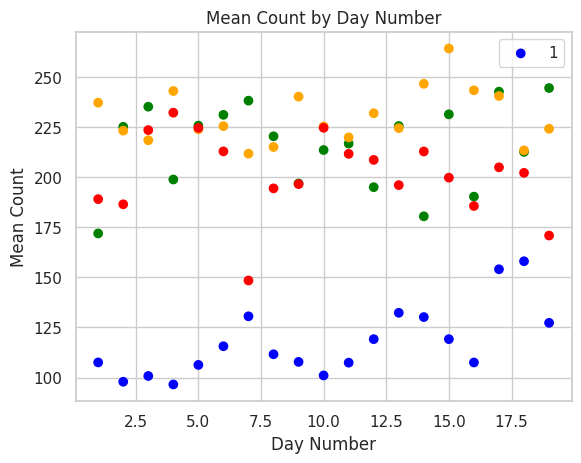

In [ ]:
colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}  # Add more colors if needed

df['datetime'] = pd.to_datetime(df['datetime'])
df['day_number'] = df['datetime'].dt.day
mean_counts = df.groupby(['day_number', 'season'])['count'].mean().reset_index()


mean_counts = df.groupby(['day_number', 'season'])['count'].mean().reset_index()

# plot the mean counts
plt.scatter(mean_counts['day_number'], mean_counts['count'], c=mean_counts['season'].map(colors))
plt.legend(colors)
plt.title('Mean Count by Day Number')
plt.xlabel('Day Number')
plt.ylabel('Mean Count')
plt.show()




We will try to find correlations between the features, while keeping the categorical features fixed with 1 value each time.

<ipython-input-17-3bef5a8d1d37>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


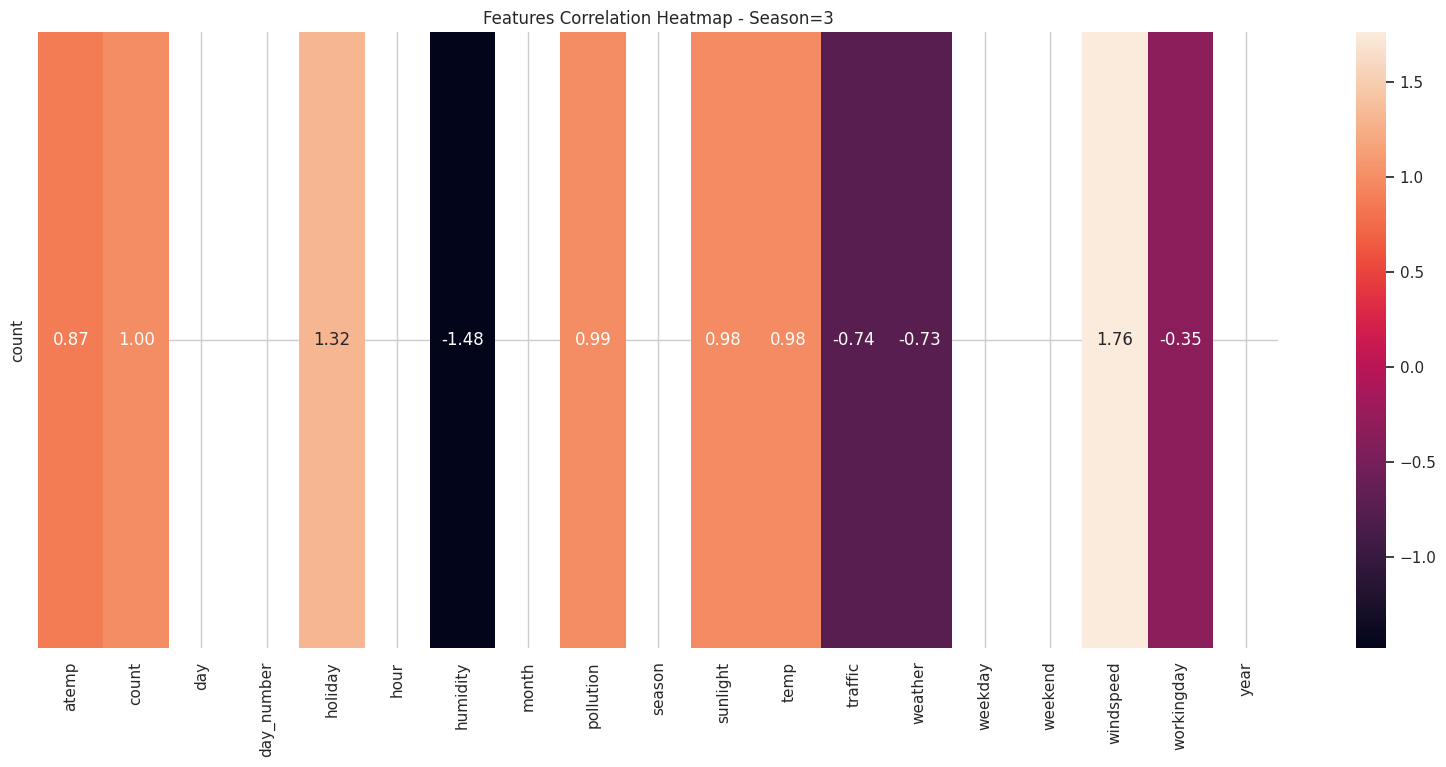

<ipython-input-17-3bef5a8d1d37>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


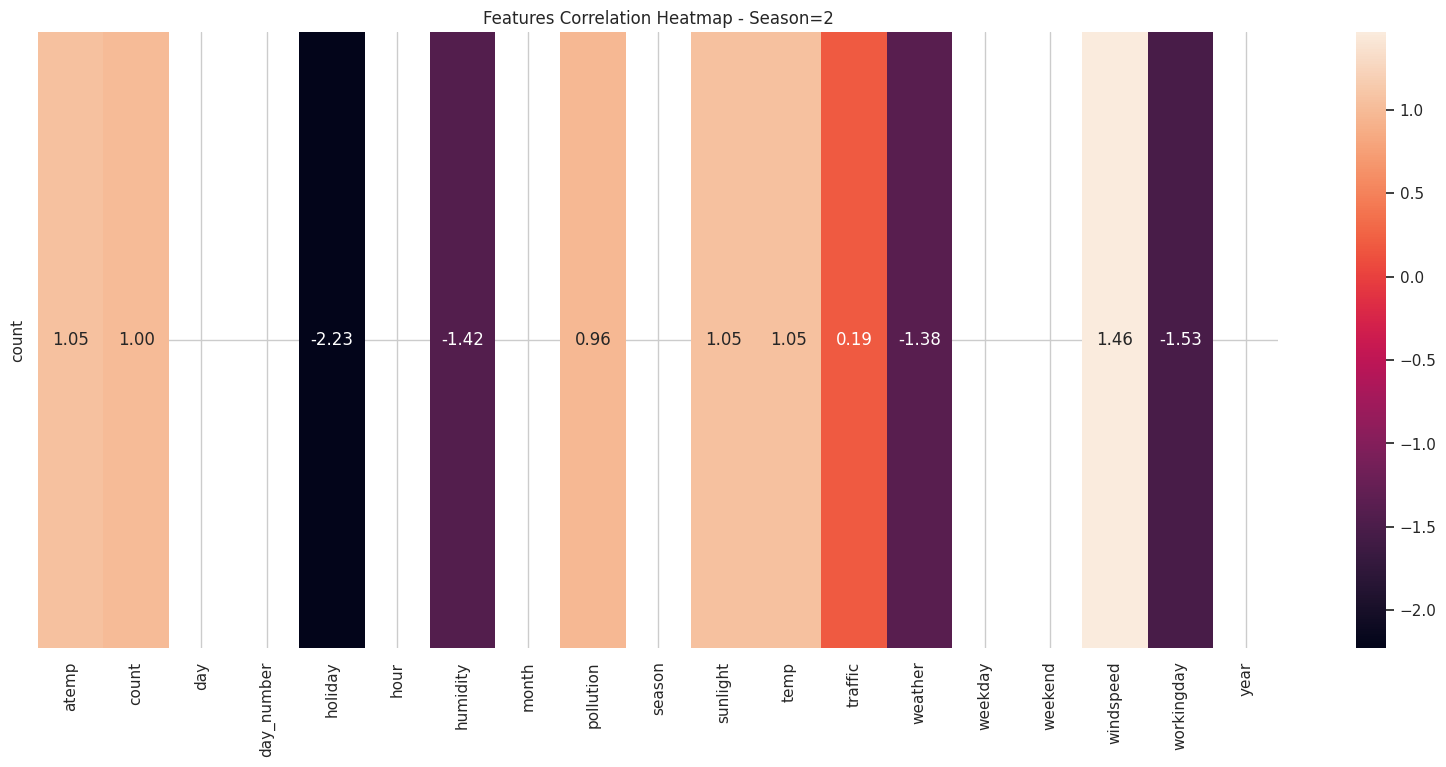

<ipython-input-17-3bef5a8d1d37>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


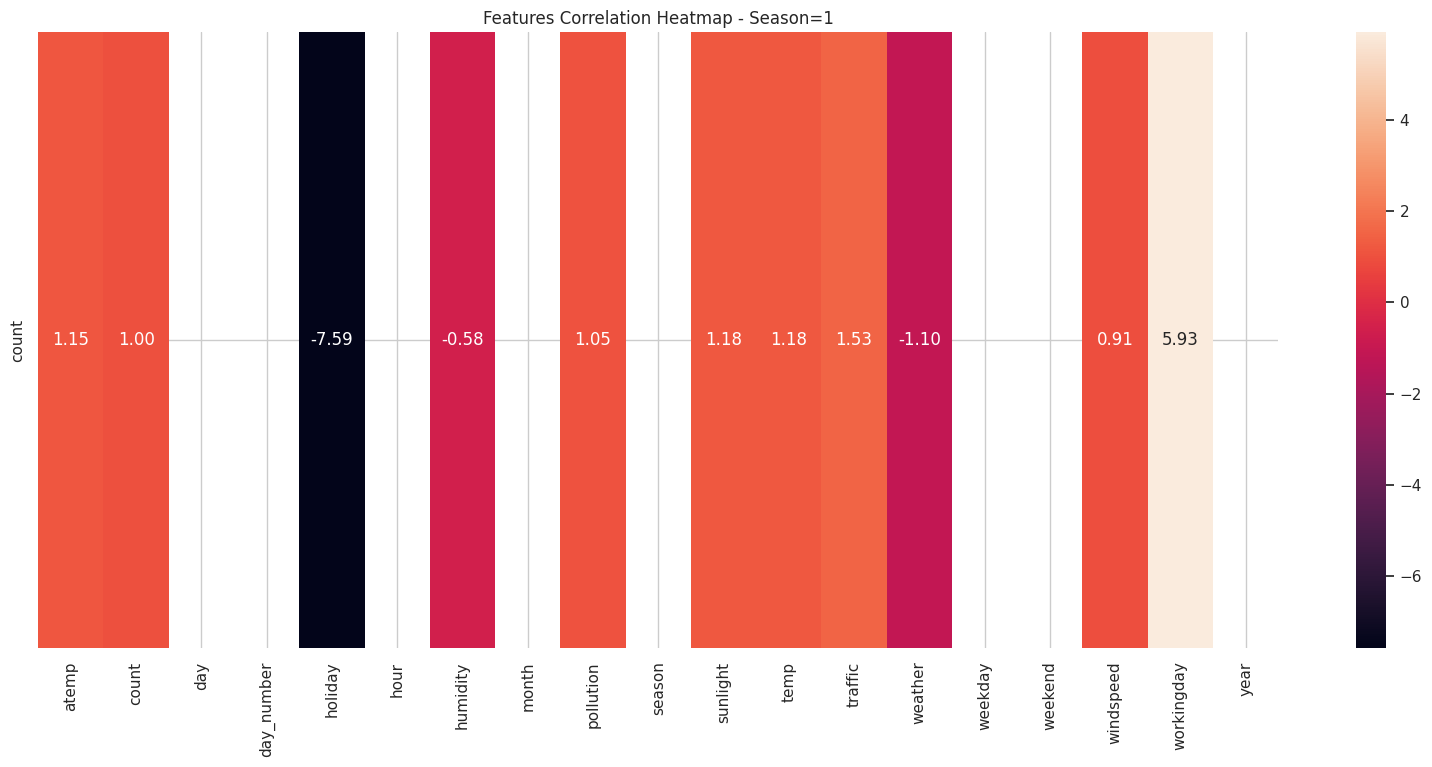

<ipython-input-17-3bef5a8d1d37>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


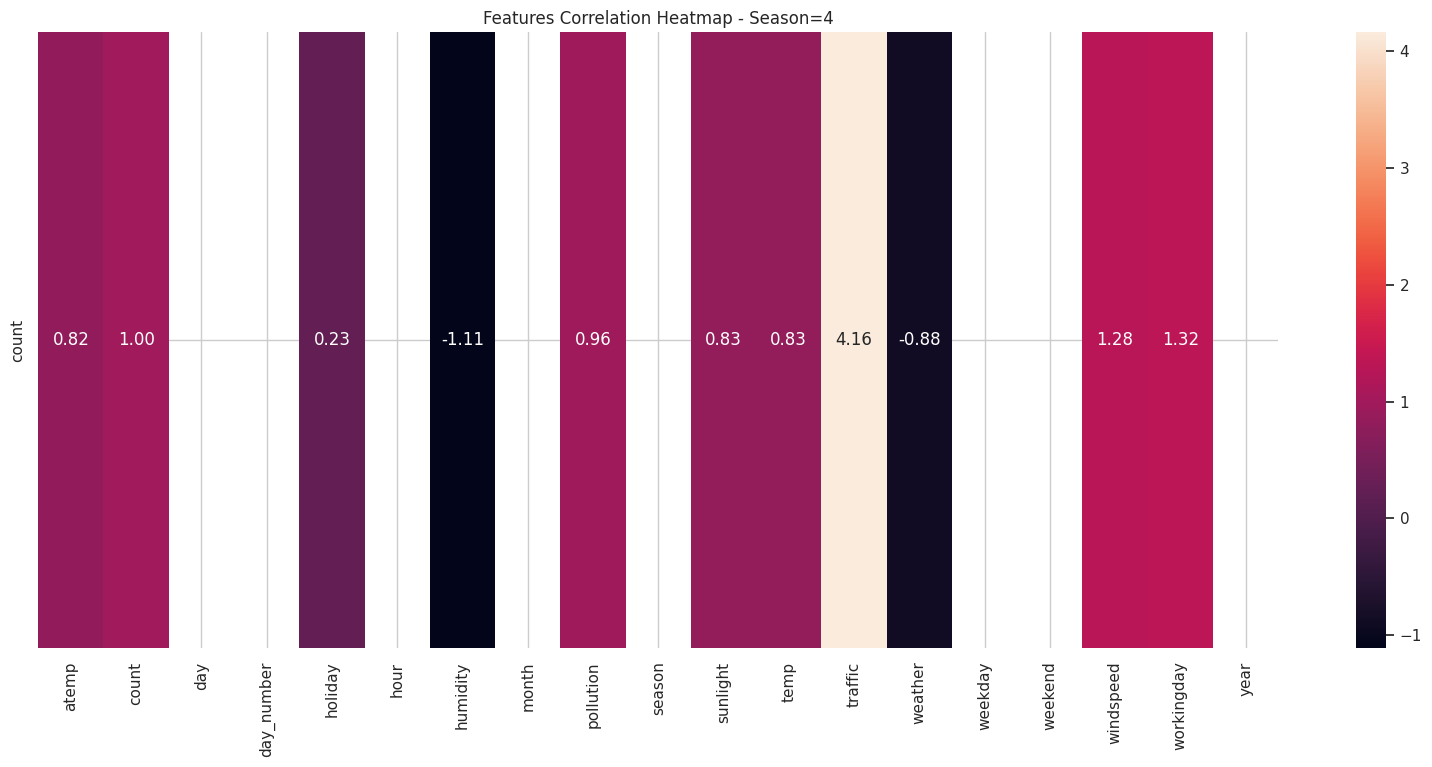

In [ ]:
# correlation graph for each season
seasons = df['season'].unique()
for season_value in seasons:
    season_df = df[df['season'] == season_value]
    corr_mat_season = season_df.corr() / corr_mat_original
    corr_mat_season = corr_mat_season.loc[['count'], :]
    plt.figure(figsize=(20, 8))
    plt.title(f'Features Correlation Heatmap - Season={season_value}')
    sns.heatmap(corr_mat_season, annot=True, fmt='.2f')
    plt.show()

### Season 3:

Mainly interactions with the boolean featuers

### Season 2:

Mainly interactions with other boolean + Windspeed

### Season 1:

Change in holiday big difference in humidity and working day

### Season 4:

Big change in holiday

<ipython-input-18-56e3a2b60d29>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_holiday = holiday_df.corr() / corr_mat_original


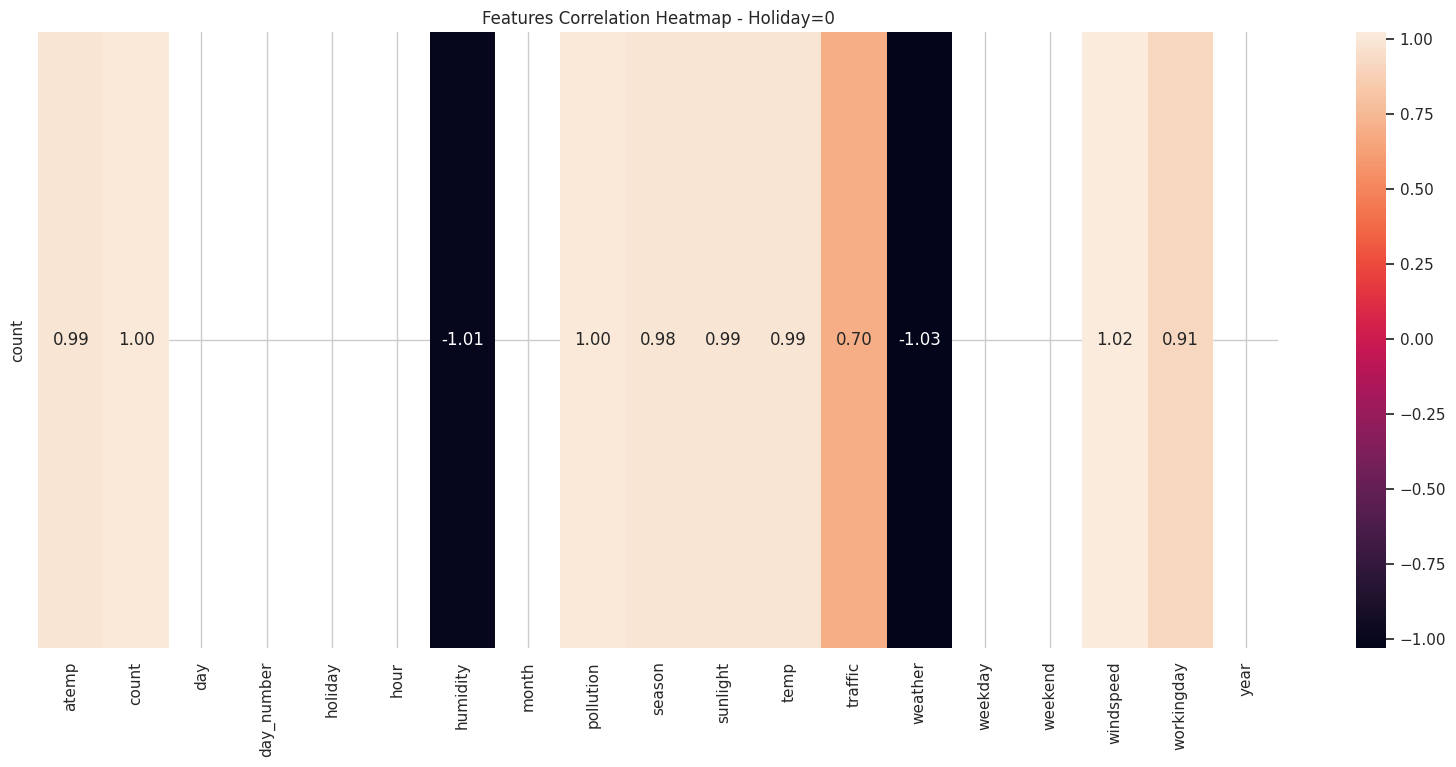

<ipython-input-18-56e3a2b60d29>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_holiday = holiday_df.corr() / corr_mat_original


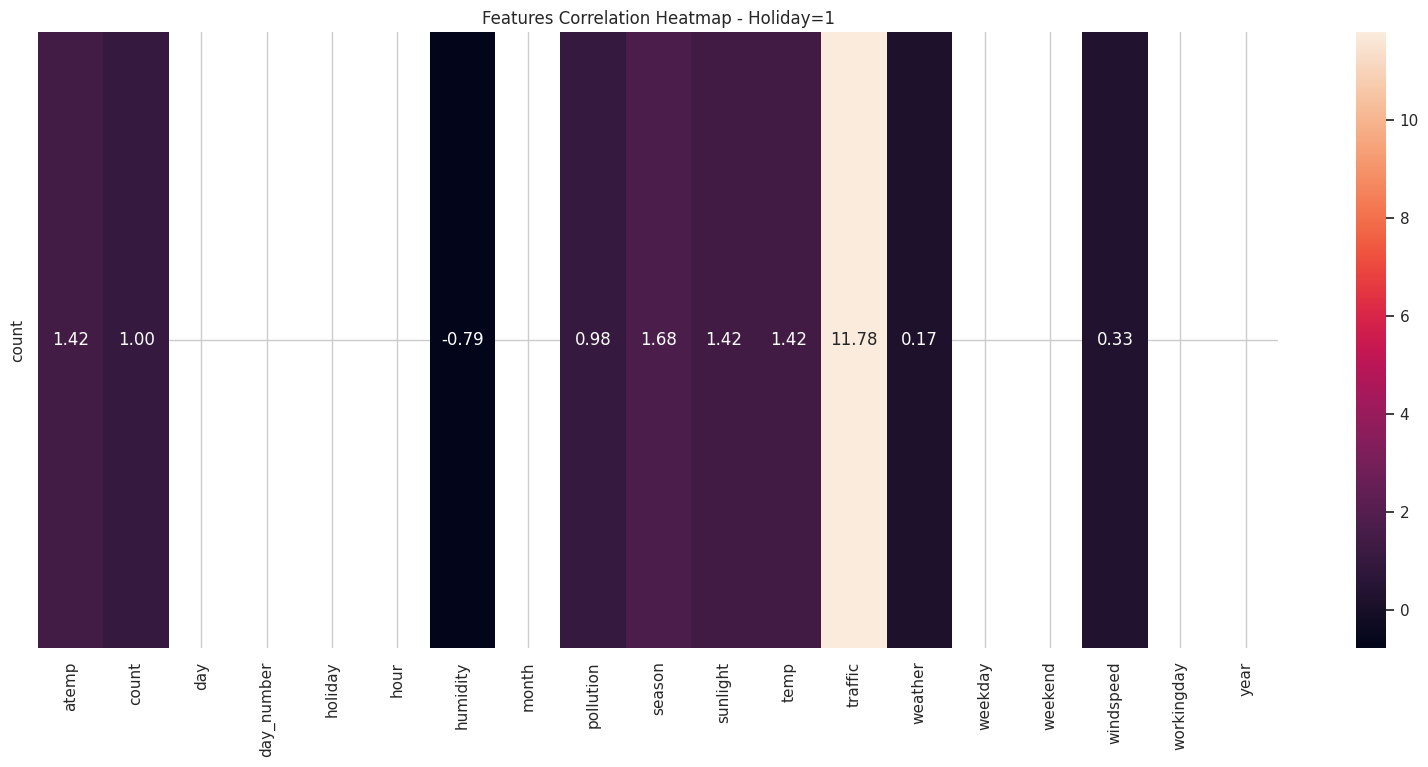

In [ ]:

# correlation graph for each holiday value
for holiday_value in [0, 1]:
    holiday_df = df[df['holiday'] == holiday_value]
    corr_mat_holiday = holiday_df.corr() / corr_mat_original
    corr_mat_holiday = corr_mat_holiday.loc[['count'], :]
    plt.figure(figsize=(20, 8))
    plt.title(f'Features Correlation Heatmap - Holiday={holiday_value}')
    sns.heatmap(corr_mat_holiday, annot=True, fmt='.2f')
    plt.show()





#### Holiday 1:

strong effects of sunlight/temp


#### Holiday 0:

Barely any changes

<ipython-input-19-5b31c09ac77a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_work = work_day_df.corr() / corr_mat_original


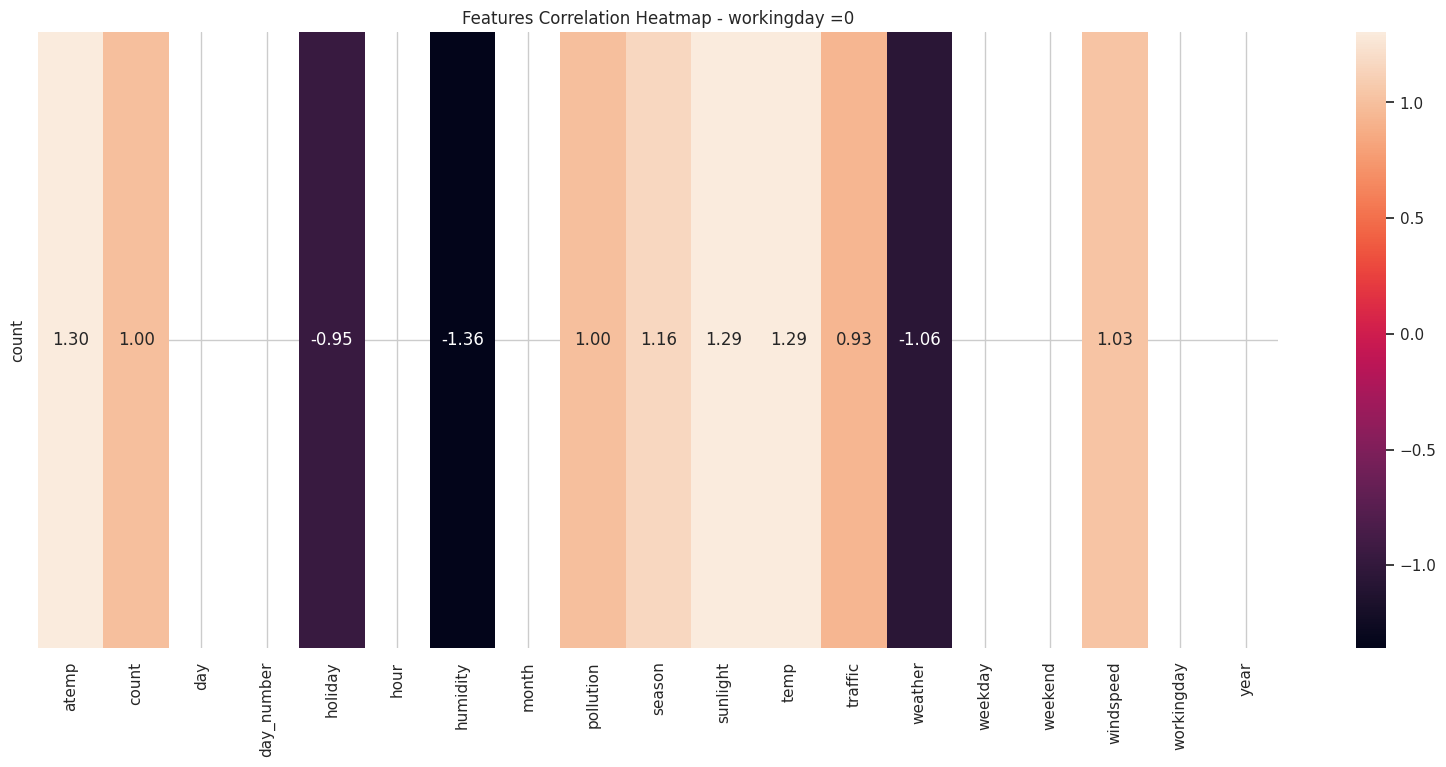

<ipython-input-19-5b31c09ac77a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_work = work_day_df.corr() / corr_mat_original


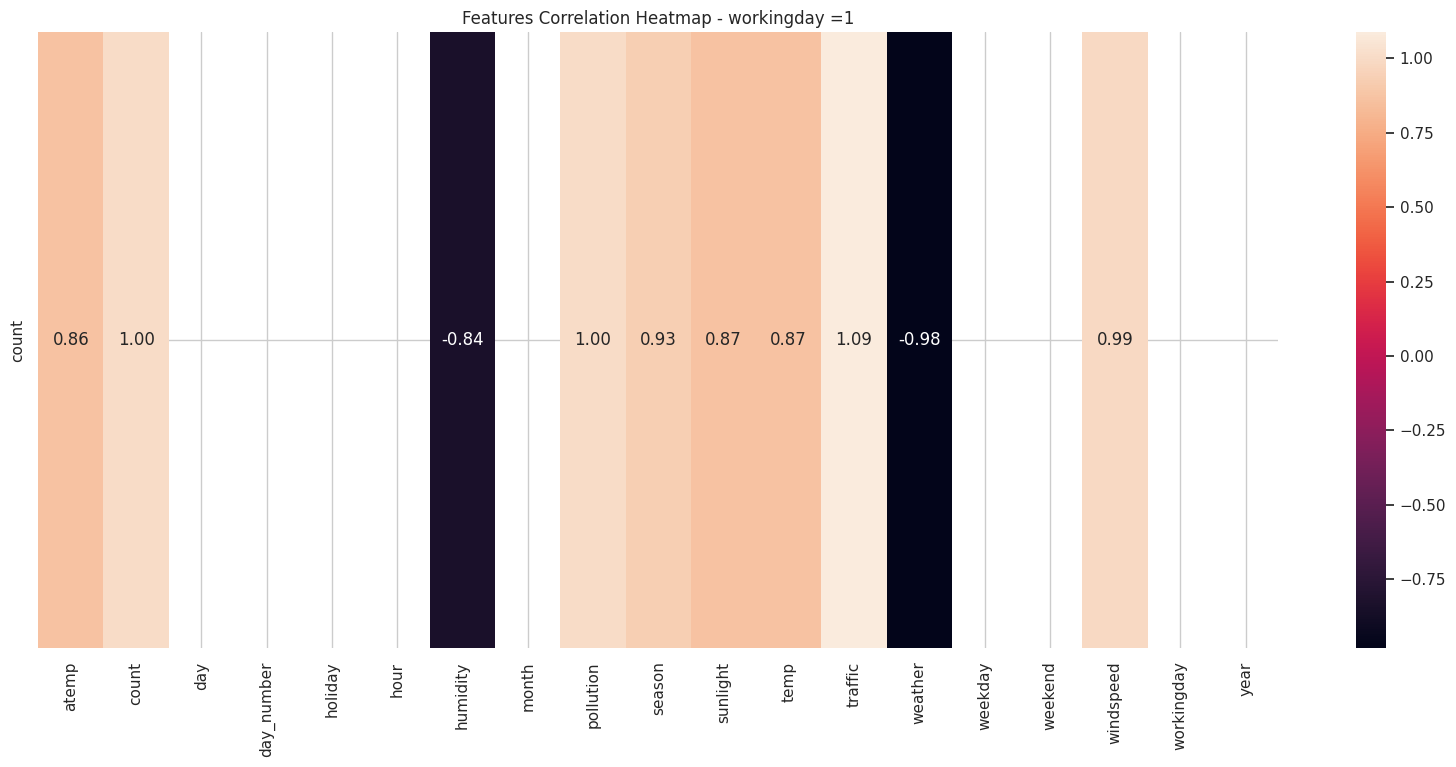

In [ ]:
for work_day_val in [0, 1]:
    work_day_df = df[df['workingday'] == work_day_val]
    corr_mat_work = work_day_df.corr() / corr_mat_original
    corr_mat_work = corr_mat_work.loc[['count'], :]
    plt.figure(figsize=(20, 8))
    plt.title(f'Features Correlation Heatmap - workingday ={work_day_val}')
    sns.heatmap(corr_mat_work, annot=True, fmt='.2f')
    plt.show()

workingday 1:

not many changes, slight difference

workingday 0:

changes in temp (and others) and humidity

In [ ]:
interactions = [('workingday', 'temp'), ('workingday', 'humidity'), ('holiday', 'temp'),
                ('season2', 'windspeed'), ('season1', 'humidity'), ('season1', 'workingday'),
                ('season4'), ('holiday')]

And now we do ln on the dataframe, and do the same as above

In [ ]:
cont_variables = ['temp', 'atemp', 'sunlight', 'humidity', 'windspeed', 'pollution', 'trafic']

ln_df = df.copy()

for col in ln_df.columns:
    if col in cont_variables:
        ln_df[col] = np.log(ln_df[col] + 1)

Correlation graph for each holiday value

<ipython-input-22-fc959ef45cd2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_holiday = holiday_df.corr() / corr_mat_original


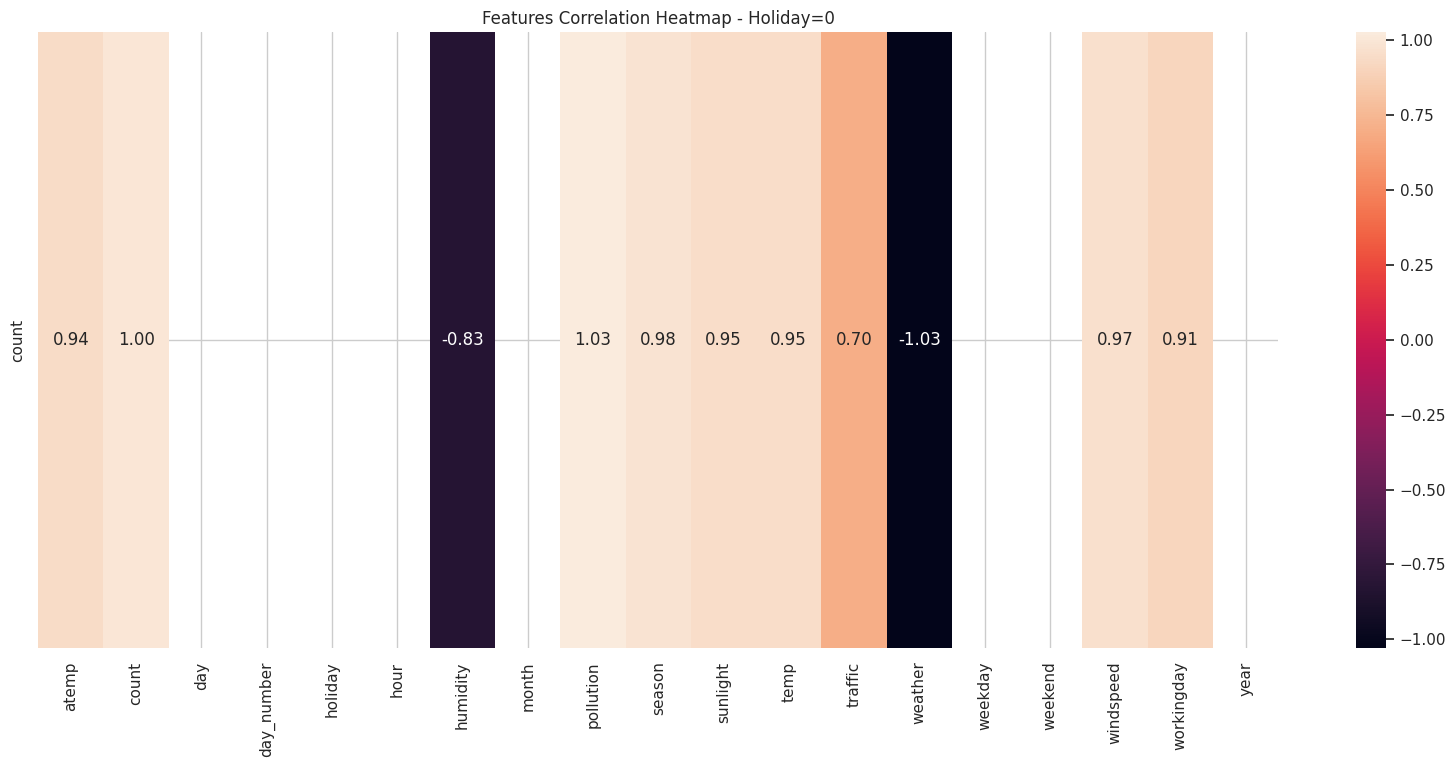

<ipython-input-22-fc959ef45cd2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_holiday = holiday_df.corr() / corr_mat_original


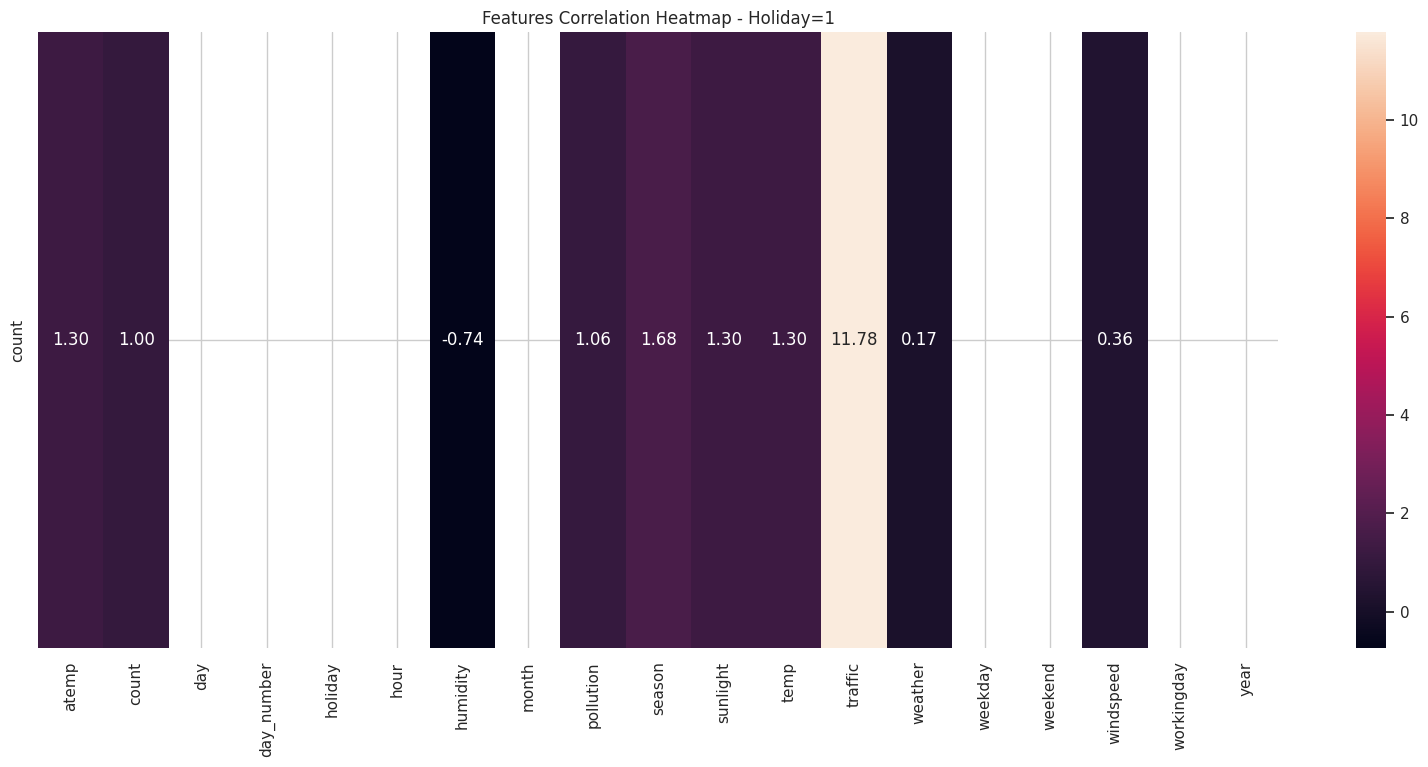

In [ ]:
for holiday_value in [0, 1]:
    holiday_df = ln_df[ln_df['holiday'] == holiday_value]
    corr_mat_holiday = holiday_df.corr() / corr_mat_original
    corr_mat_holiday = corr_mat_holiday.loc[['count'], :]
    plt.figure(figsize=(20, 8))
    plt.title(f'Features Correlation Heatmap - Holiday={holiday_value}')
    sns.heatmap(corr_mat_holiday, annot=True, fmt='.2f')
    plt.show()



Holiday 1 - Weather

Holiday 1 temp / sunlight and such

Correlation graph for each season

<ipython-input-23-21eb491e3c32>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_work = work_day_df.corr() / corr_mat_original


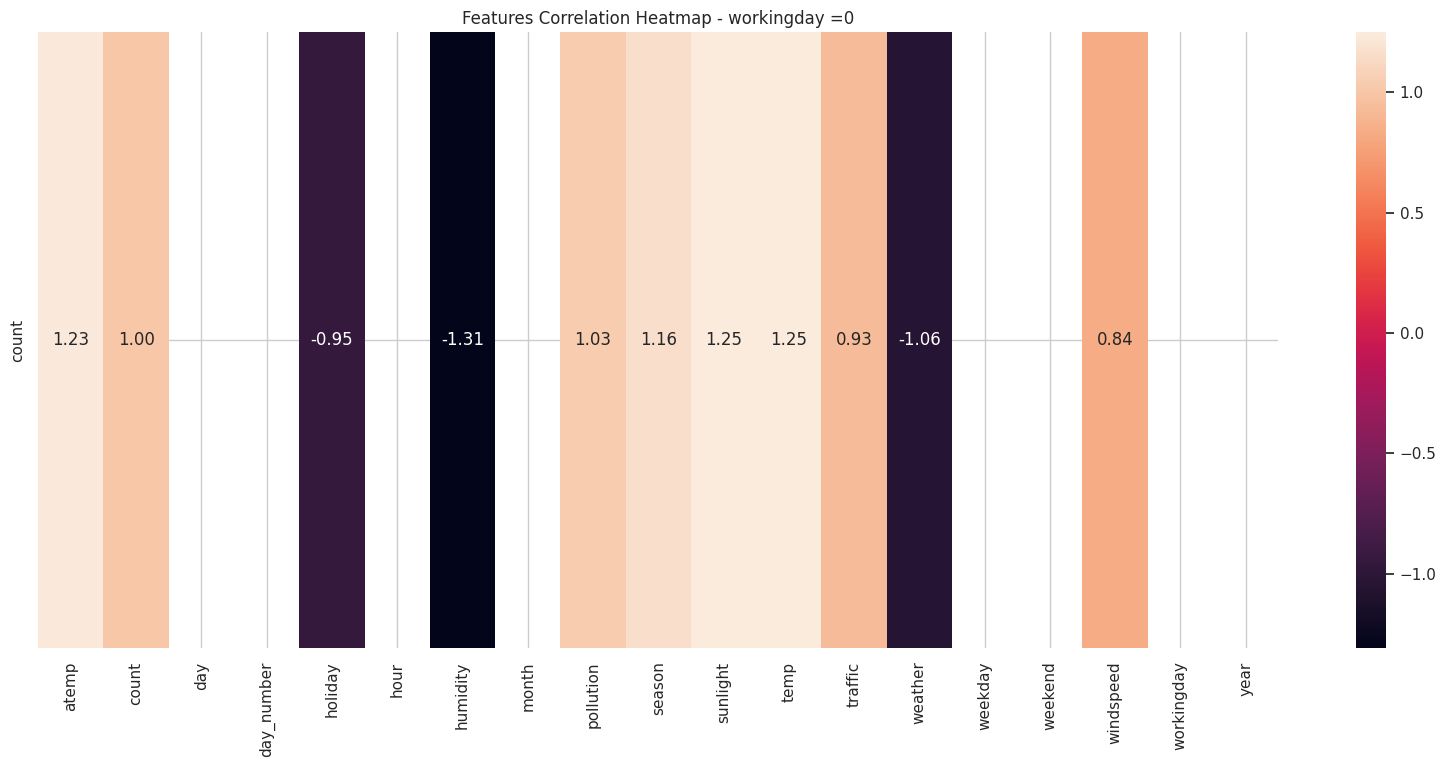

<ipython-input-23-21eb491e3c32>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_work = work_day_df.corr() / corr_mat_original


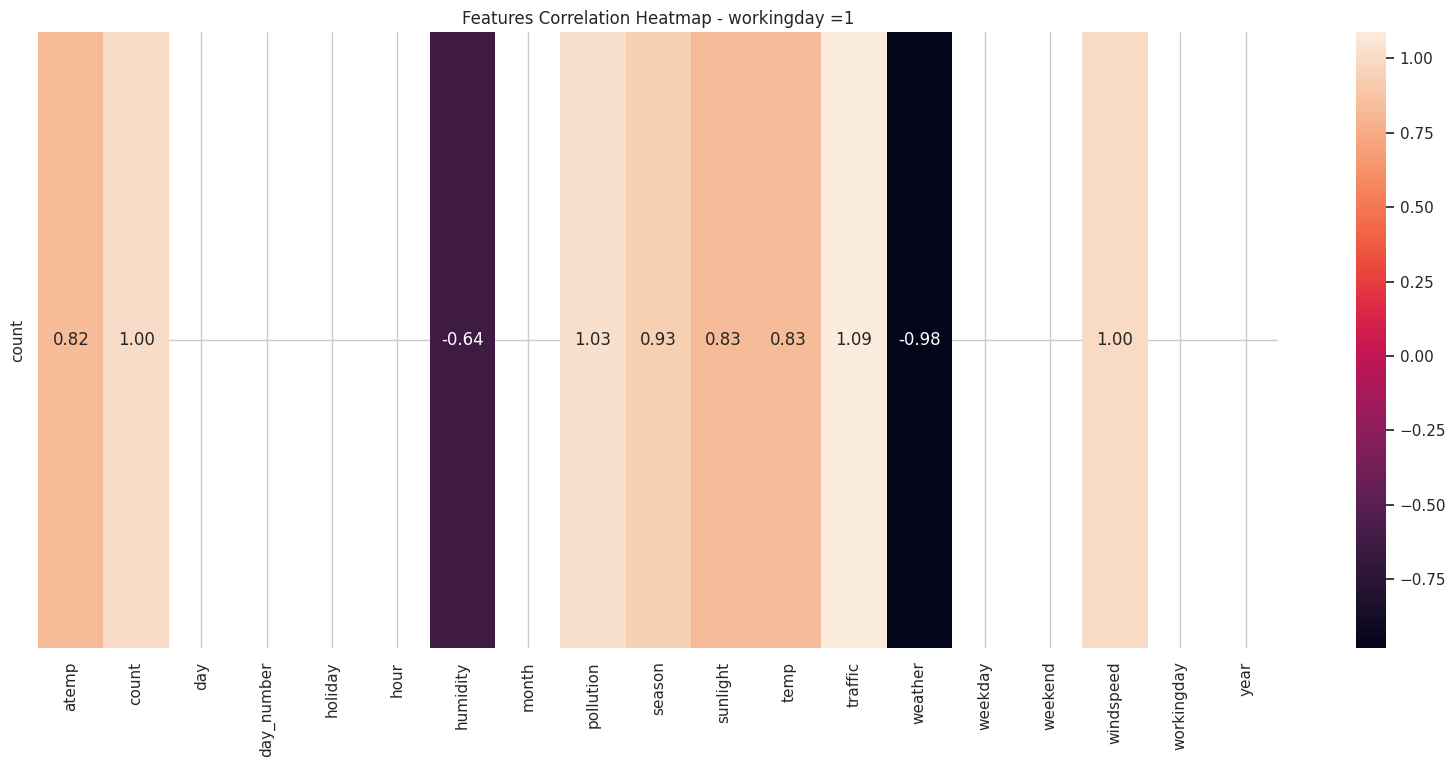

In [ ]:
seasons = df['season'].unique()

for work_day_val in [0, 1]:
    work_day_df = ln_df[ln_df['workingday'] == work_day_val]
    corr_mat_work = work_day_df.corr() / corr_mat_original
    corr_mat_work = corr_mat_work.loc[['count'], :]
    plt.figure(figsize=(20, 8))
    plt.title(f'Features Correlation Heatmap - workingday ={work_day_val}')
    sns.heatmap(corr_mat_work, annot=True, fmt='.2f')
    plt.show()

workingday * sunlight (or temp and correlated)

<ipython-input-24-95cb4ee0de25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


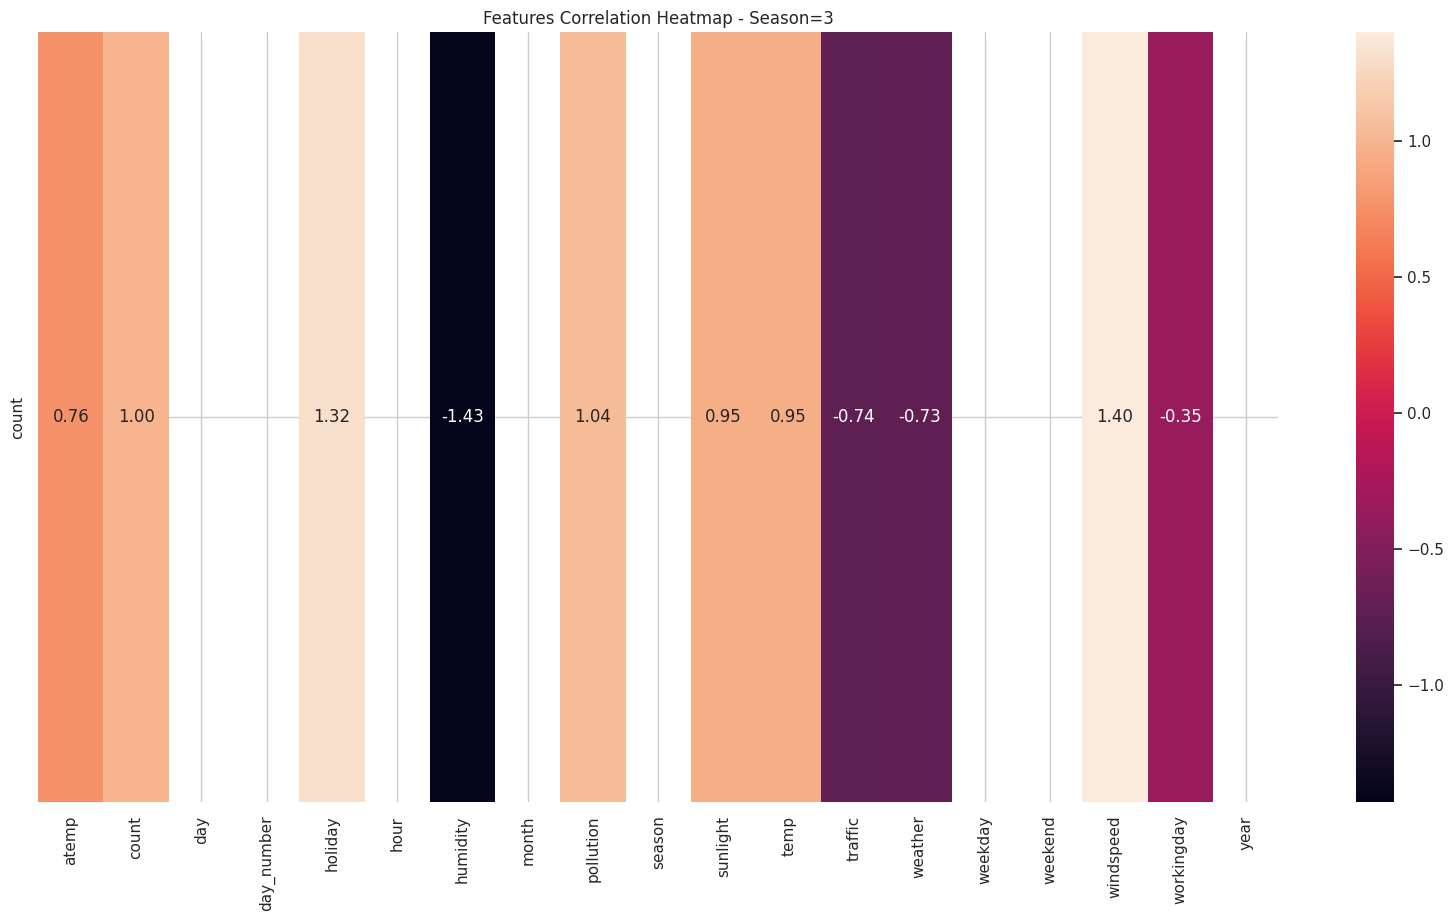

<ipython-input-24-95cb4ee0de25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


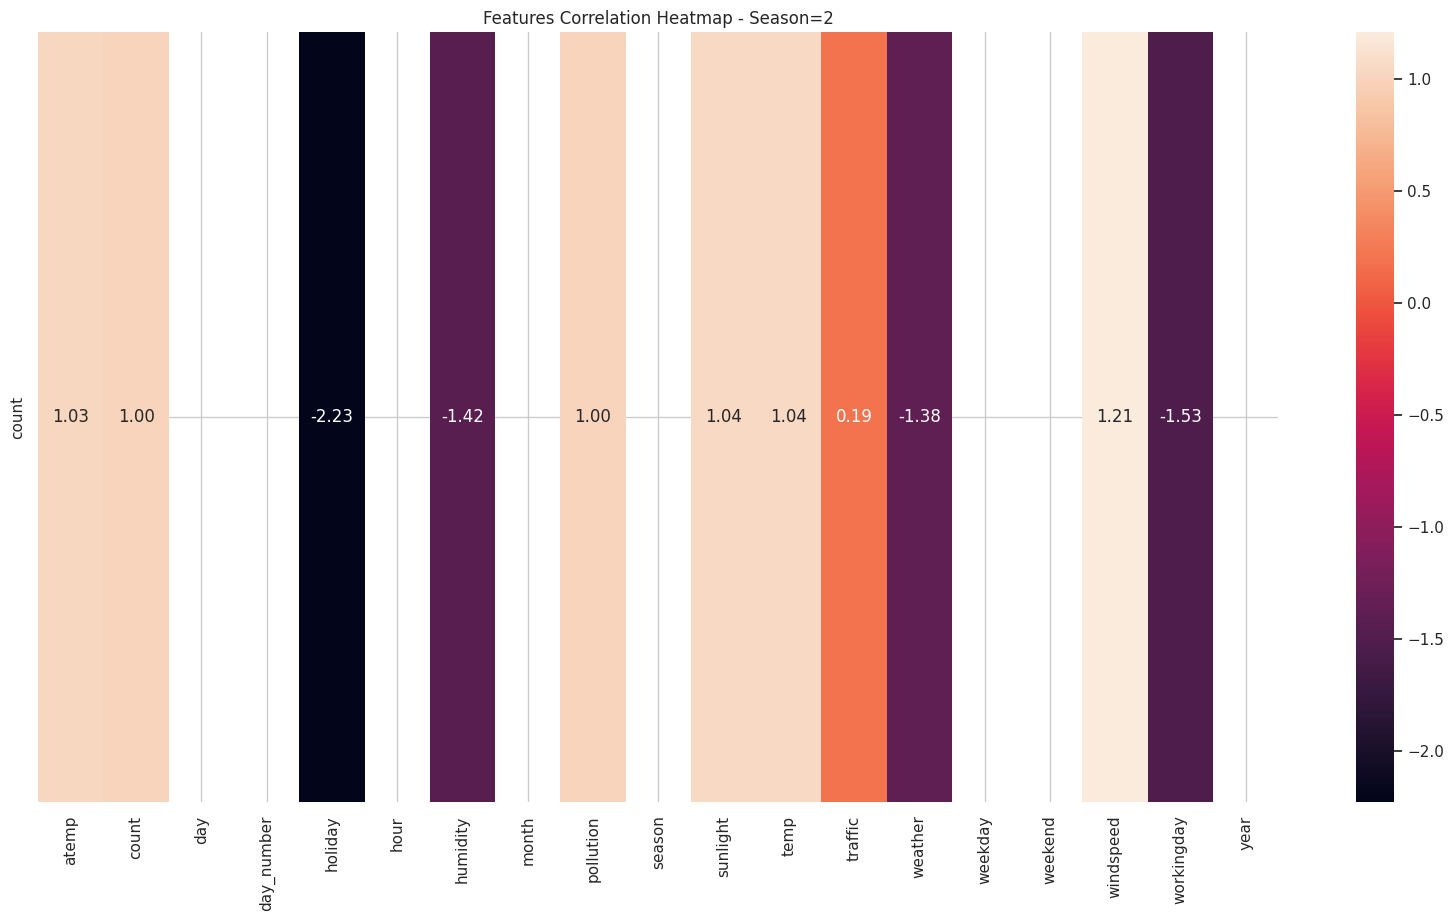

<ipython-input-24-95cb4ee0de25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


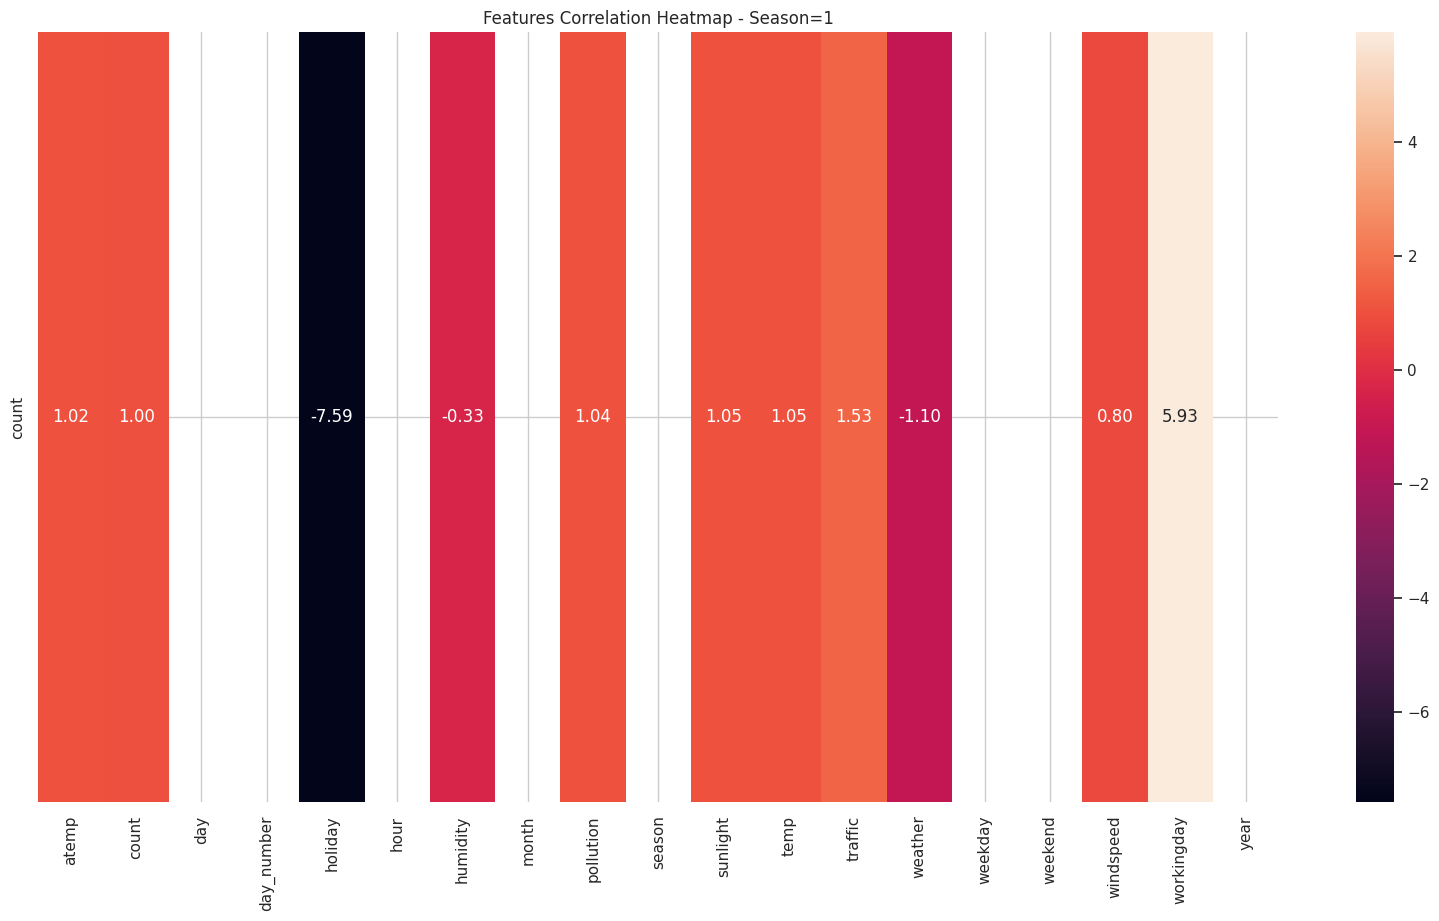

<ipython-input-24-95cb4ee0de25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_season = season_df.corr() / corr_mat_original


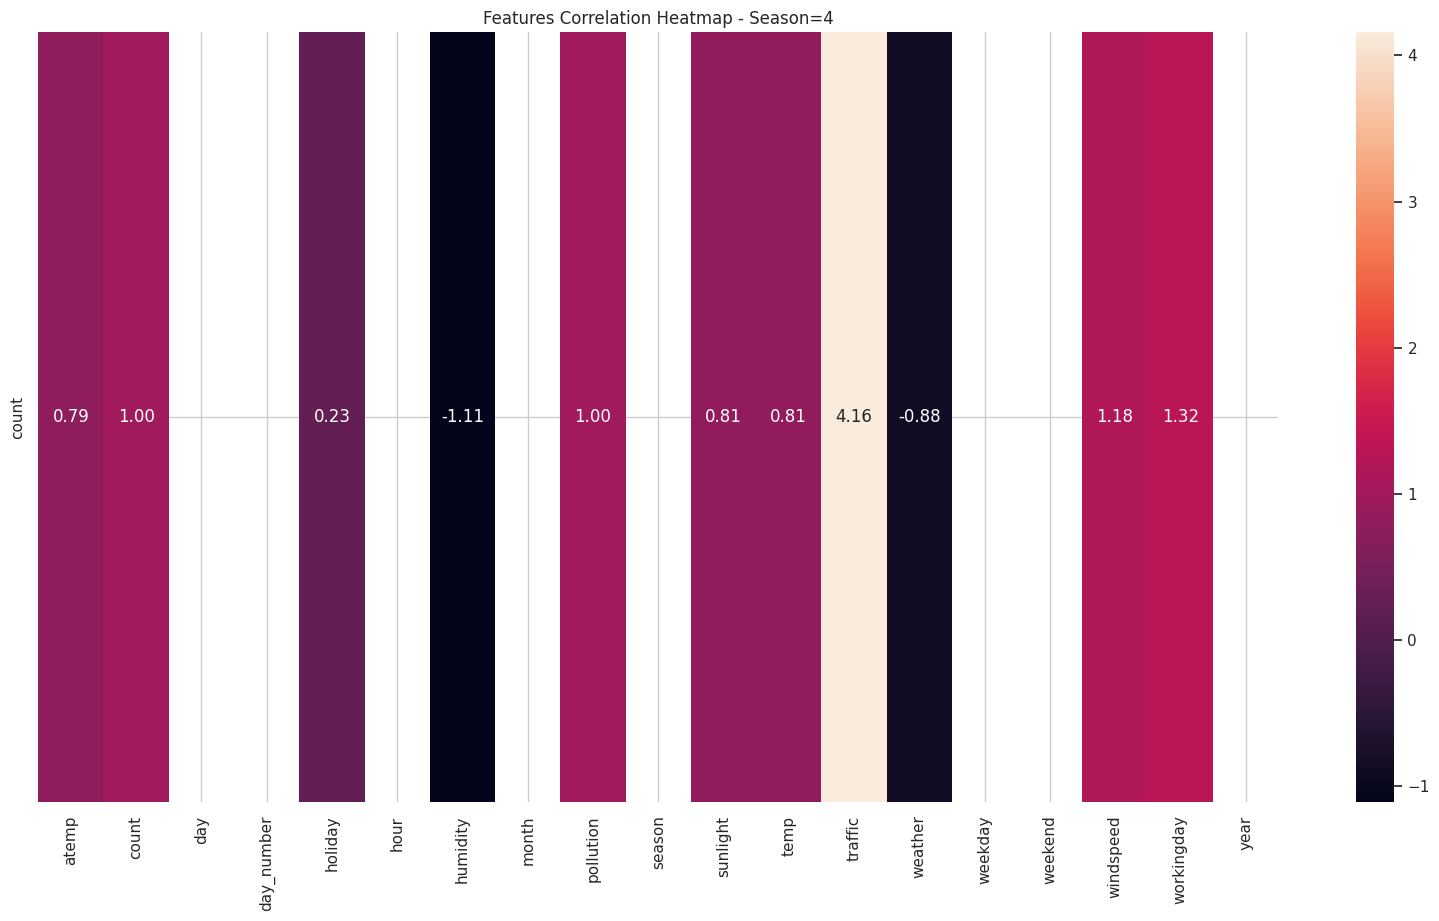

In [ ]:
for season_value in seasons:
    season_df = ln_df[ln_df['season'] == season_value]
    corr_mat_season = season_df.corr() / corr_mat_original
    corr_mat_season = corr_mat_season.loc[['count'], :]
    plt.figure(figsize=(20, 10))
    plt.title(f'Features Correlation Heatmap - Season={season_value}')
    sns.heatmap(corr_mat_season, annot=True, fmt='.2f')
    plt.show()

season3: temp / sunlight and humidity change

season2: weather and windspeed

season1: humidity

season4: holiday

Conclusion about interactions:

We see that while setting some of the catagorical features fixed, certain features affect the count differently than if we would ignore the fixed effect. meaning we should add an interaction so we will "fix" the effect.

For example if we would like to describe a slope between a feature and the count, we would like to fix the slope according to certain features.

In [ ]:
ln_interactions = [('season3', 'temp'), ('season2' ,'weather'), ('season2', 'windspeed'), ('season4', 'holiday'),
                   ('workingday', 'temp'), ('holiday', 'weather'), ('holiday', 'temp')]

#HANDLE OUTLIERS

In order to clean outliers from the data, we need to examine for each feature where most of its values are concentrated.
We will do it using a boxplot for each feature. As we know, a boxplot divides all the values of a feature to quarters. if a value steps outsides the quarters it is probably an outlier, and we will consider deleting it.
At the boxplot above we will draw an orange line between the lower median and the upper median.
It is important to mention that we use boxplots because we saw that most of the features distribute normally.

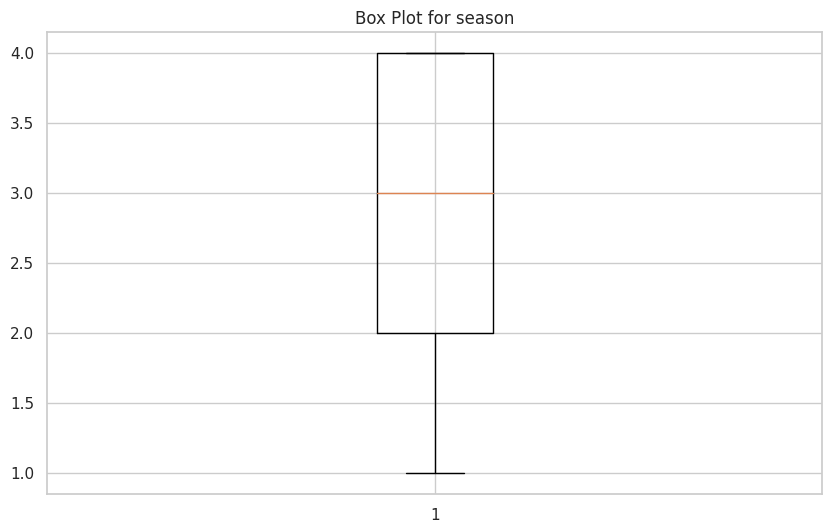

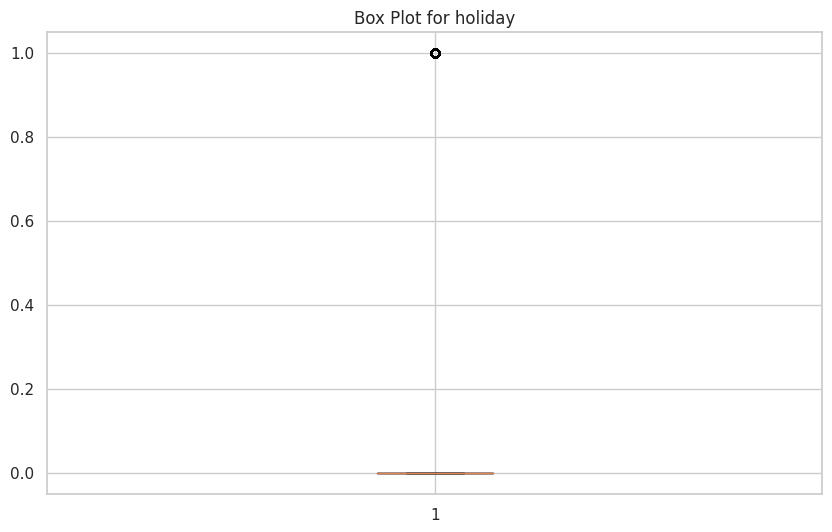

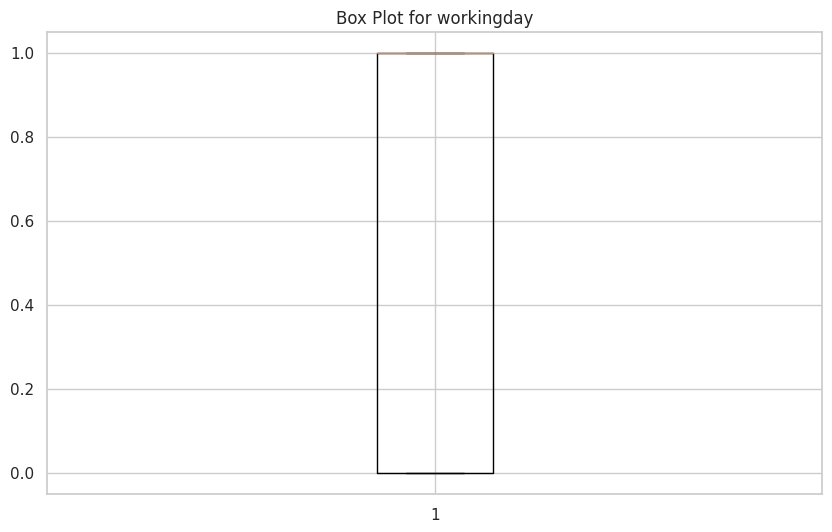

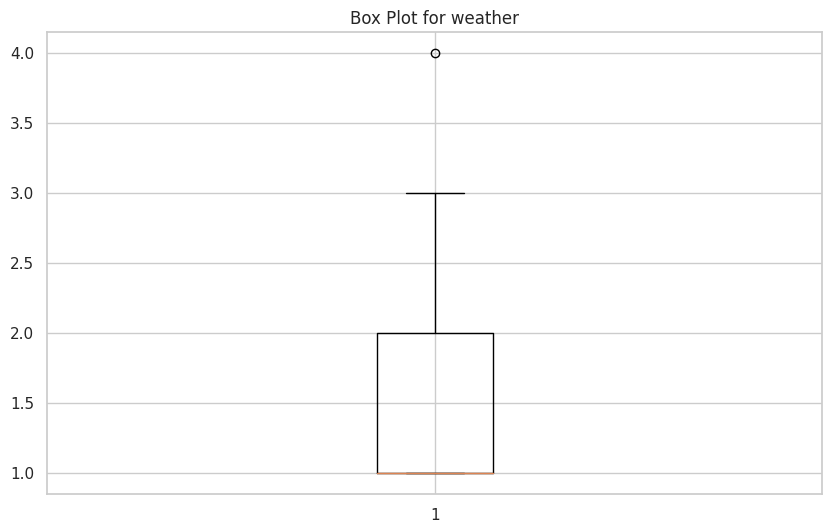

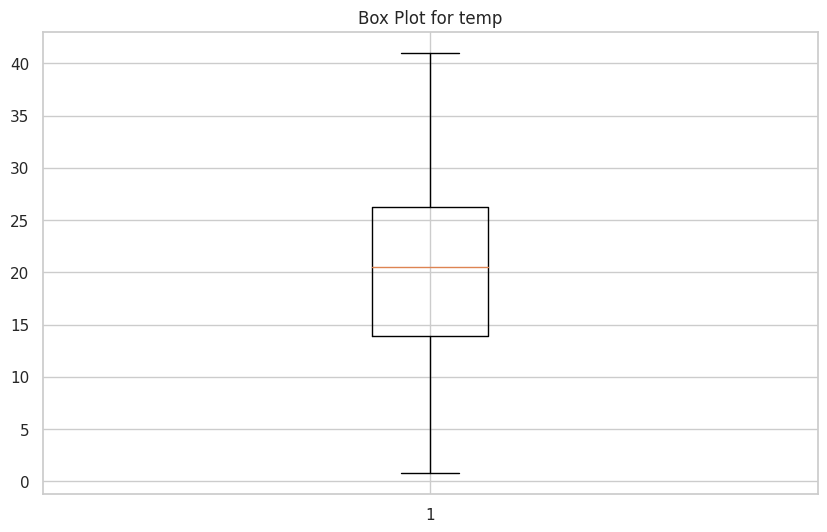

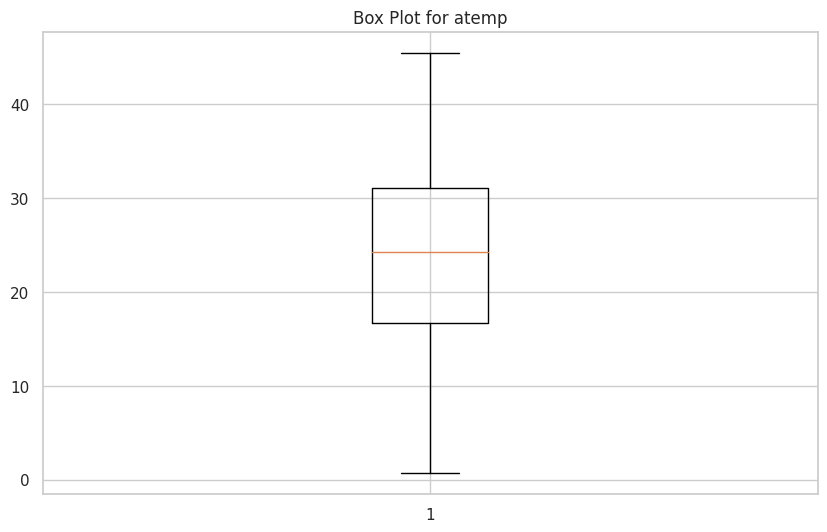

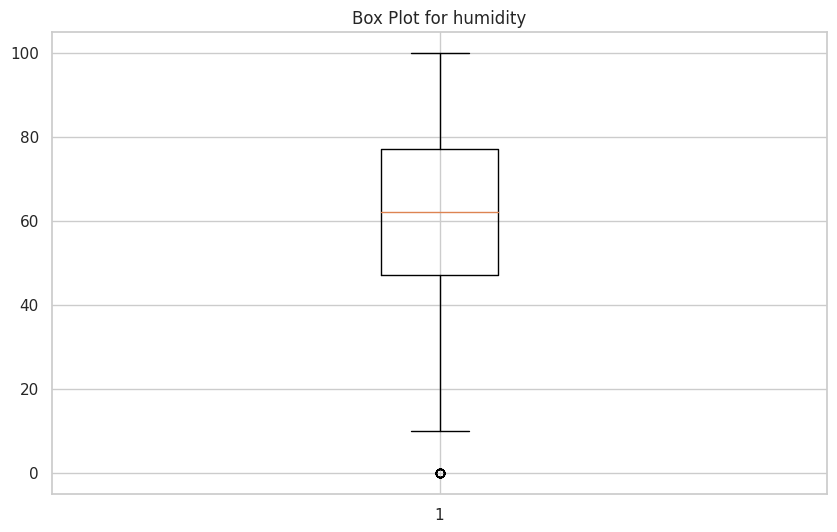

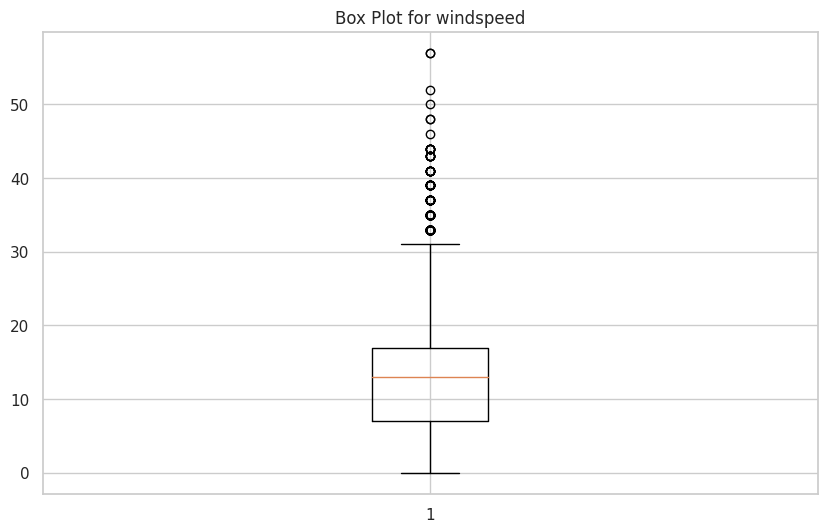

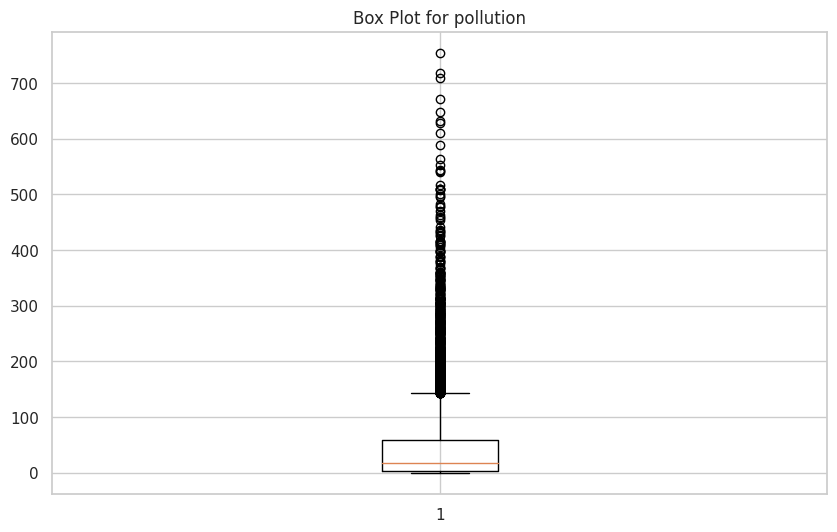

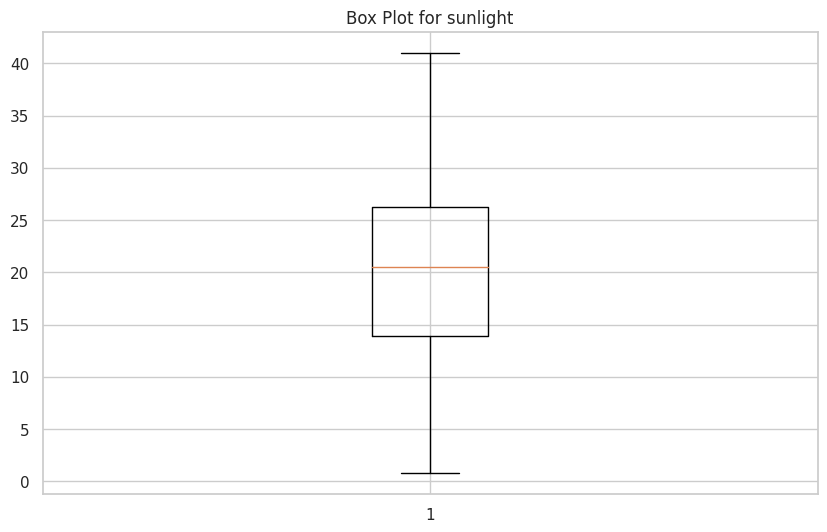

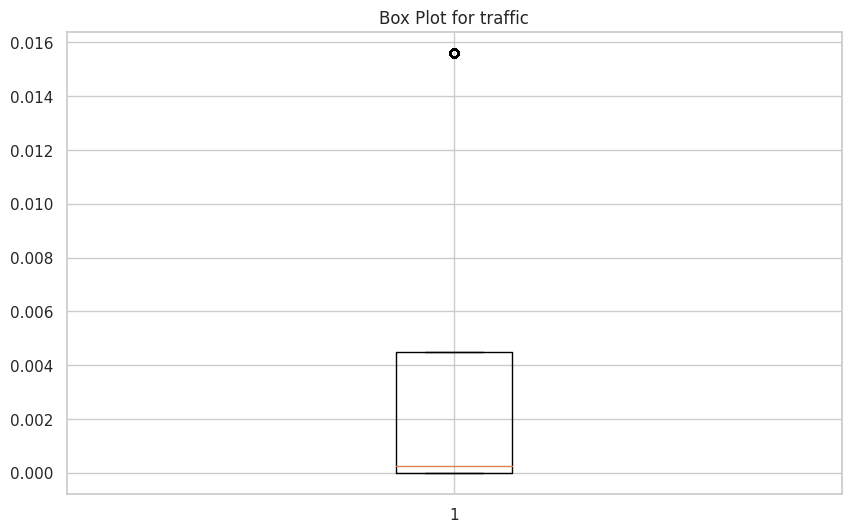

In [ ]:
df_columns = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','pollution','sunlight','traffic']

for column in df_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


###Some important notes we noticed after examining the boxplots:

####holiday:
We can see that the 'holiday' feature has only 2 values (it make sense as it is a categorical feature), and there are very few samples with the value 1. In the previous sections we saw the distribution of the feature and learned that most of the days are not holiday, but ~2% of them are. So we know that the samples with value 1 we see in the boxplot are not outliers.

####weather:
We can see that half of the samples in this feature has values between 0-1, and the other half has values between 1-3. We also showed in the previous section the distribution of this feature, and 99.99% of its values are between 0-3. So we conclude that the dot at the value of 4 is an outlier.

####humidity:
In this feature we see that all the samples are vary between the values 10-100. There is only one dot with the value of 0 that seems like an outlier.

####windspeed:
We can see that almost 100% of the samples are between the values of 0-30. There are several dots that seems like outliers, we will examine which of them are indeed an outliers and remove them.


####pollution:
In this feature we see that most of the sample's values are vary between 0-150. We also see that there are a large amunt of dots above the last quartile, meaning there might be large amount of outliers. We will consider if removing them or not, because in the previous sections we saw there is a strong correlation between 'pollution' and 'count' (0.6).


####traffic:
In this feature we see that most of the sample's values are vary between 0 - 0.004. In the previous section we also saw the distribution of this feature, so we know that almost 100% of the data is vary between 0 - 0.004 and splits equaly between those values. It means that the dot we see at the y axes with the value of 0.016 is an outlier indeed.

In [ ]:
def remove_weather_outliers(df, threshold_value = 3):

  df_copy = df.copy()
  # Count the number of samples above the threshold
  above_threshold_count = (df_copy['weather'] > threshold_value).sum()

  print(f"Number of weather samples above {threshold_value}: {above_threshold_count}")

  # Locate the indexes of samples above the threshold
  indices_above_threshold = df_copy.loc[df_copy['weather'] > threshold_value].index

  # Drop the rows with indices above the threshold
  df_copy = df_copy.drop(indices_above_threshold)

  # Resetting the index after dropping rows
  df_copy = df_copy.reset_index(drop=True)
  return df_copy,above_threshold_count

As we can see, the amount of samples that has value above 3 in the feature 'weather' is only one, so we can be sure it is an outlier and we can delete it.

In [ ]:
def remove_humidity_outlier(df, threshold_value = 10):


  df_copy = df.copy()
  # Count the number of samples above the threshold
  below_threshold_count = (df_copy['humidity'] < threshold_value).sum()

  print(f"Number of humidity samples below {threshold_value}: {below_threshold_count}")

  # Locate the indexes of samples below the threshold
  indices_below_threshold = (df_copy['humidity'] < threshold_value)

  # Drop the rows with indices above the threshold
  df_copy = df_copy[~indices_below_threshold]

  # Resetting the index after dropping rows
  df_copy = df_copy.reset_index(drop=True)
  return df_copy,below_threshold_count

On the boxplot of 'humidity' above we saw that the first quartile begins aroung the the value of 10, so we will check how many samples there are with value below 10 in the feture of 'humidity'.
As we can see there are only 15 samples with value below 10, so we conclude they are utliers and we will drop them.

In [ ]:
def remove_windspeed_outlier(df, threshold_value = 50):
  df_copy = df.copy()
  above_threshold_count = (df_copy['windspeed'] > threshold_value).sum()

  print(f"Number of windspeed samples above {threshold_value}: {above_threshold_count}")

  # Locate the indexes of samples below the threshold
  indices_above_threshold = df_copy.loc[df_copy['windspeed'] > threshold_value].index

  # Drop the rows with indices above the threshold
  df_copy = df_copy.drop(indices_above_threshold)

  # Resetting the index after dropping rows
  df_copy = df_copy.reset_index(drop=True)
  return df_copy,above_threshold_count


On the previous section we plotted the distribution of the feture 'windspeed' and saw that most of the samples have values between 0-30, while there are very few samples above the value 30. Also in the boxplot above we can that almost 100% of the samples are between 0-30, while there are some dots above it. This made us check how many samples there are with value that is greater than 30, and we saw there are 325 samples (4%). Then we checked how many samples are greater than 40 and saw there is only 30 of them - so we decided to drop all the dsamples above 40.

In [ ]:
def remove_pollution_outliers(df, threshold_value = 500):

  df_copy = df.copy()
  # Count the number of samples above the threshold
  above_threshold_count = (df_copy['pollution'] > threshold_value).sum()

  print(f"Number of pollution samples above {threshold_value}: {above_threshold_count}")

  # Locate the indexes of samples above the threshold
  indices_above_threshold = df_copy.loc[df_copy['pollution'] > threshold_value].index

  # Drop the rows with indices above the threshold
  df_copy = df_copy.drop(indices_above_threshold)

  # Resetting the index after dropping rows
  df_copy = df_copy.reset_index(drop=True)
  return df_copy,above_threshold_count

After looking at the boxplot of the feature 'pollution', we can see that there are a lot of dots above the forth quartile which can suggest there are a lot of outliers. From the other hand, we know that this feature has a strong correlation to the label 'count' (from the correlation matrix) and it can help us predict it better. This is the reason why we didn't want to drop a lot of samples even if they are above the forth quartile of the boxplot. We decided to determine the value of 500 to be thr threshold which every sample that has greater value will be deleted (only 20 samples).

# Pre Processing

Creating caching layer so we could learn from the train and use the results on the test seemlesly.

To use the caching just pass is_test along with all the other properties of the relevant function

here is an example for usage:

In [ ]:


# \@process_cache
# def processor(df, to_encode, encoder, cache):
#    <relevant key> = tuple(to_encode)  -> so it will be hashable
#    if <relevant key> not in cache:  -> will be true only if is_test=True or if train never ran before the test which is not good
#        cache[<relevant key>] = encoder.fit_transform(<data_to_encode >)
#    encoder = cache.get(<relevant key>)

# example of usage:
# processor(df, to_encode, encoder, is_test=True)


from functools import wraps
cache = {}

def process_cache(func):
    @wraps(func)
    def inner(is_test: bool = False, *args, **kwargs):
        global cache
        if not is_test:  # if this is train, re-calculate
            cache[func.__name__] = {}  # create new cache for each function, but store them all in the cache dict.
        return func(*args, **kwargs, cache=cache.get(func.__name__, {}))
    return inner


We will define a function to use OneHotEncoder to create catagroical features (e.g weather, season) as binary columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

@process_cache
def encode_data(df, to_encode, cache):
    new_df = df.copy()

    data_to_encode = new_df[to_encode]
    key = tuple(to_encode)
    if key not in cache:
        # Fit and transform the 'to_encode' columns
        cache[key] = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
        cache[key].fit(data_to_encode)

    encoder = cache[key]
    encoded_cols = encoder.transform(data_to_encode)
    # Create a DataFrame with the encoded values
    encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(to_encode))
    # Reset the index of the original DataFrame
    new_df.reset_index(drop=True, inplace=True)
    # Concatenate the original DataFrame with the encoded DataFrame
    new_df = pd.concat([new_df, encoded_cols_df], axis=1)
    # Drop the original columns as they are no longer needed
    new_df.drop(to_encode, inplace=True,axis=1)

    return new_df


Lets add a function to make it easier :)

In [ ]:
def set_interactions(df, interactions):
    '''
    adds interactions (multiplications) to the df

    Parameters:
    df: The dataframe
    interactions: list of tuples of each interaction
    '''
    df_copy = df.copy()
    for inter in interactions:
        df_copy[inter[0]+'*'+inter[-1]] = df_copy[inter[0]]*df_copy[inter[-1]]
    return df_copy

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

SCALER_KEY = 'scaler'
PCA_KEY = 'pca'

# After noticing that PCA doesn't really help us as much as removing redundant features, we won't use this function
@process_cache
def mix_cols_PCA(df, cols, colname, cache):
    '''
    Gets X df and cols, does pca transformation with fit!
    '''
    df = df.copy()

    data_to_encode = df[cols].copy()
    key = tuple(cols)
    if key not in cache:
        # Fit and transform the 'to_encode' columns
        cache[key] = {
            SCALER_KEY: StandardScaler(),
            PCA_KEY: PCA(n_components=1),
        }
        scaler = cache[key][SCALER_KEY]
        scaler.fit(data_to_encode)
        cache[key][PCA_KEY].fit(scaler.transform(data_to_encode))


    subset_scaled = cache[key][SCALER_KEY].transform(data_to_encode)
    subset_pca = cache[key][PCA_KEY].transform(subset_scaled)

    df.drop(cols, inplace=True, axis=1)
    df[colname] = subset_pca
    return df

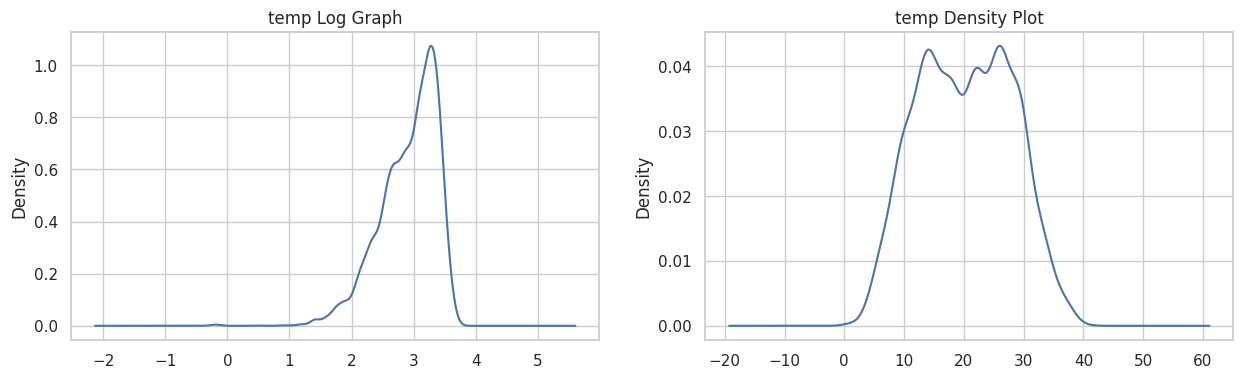

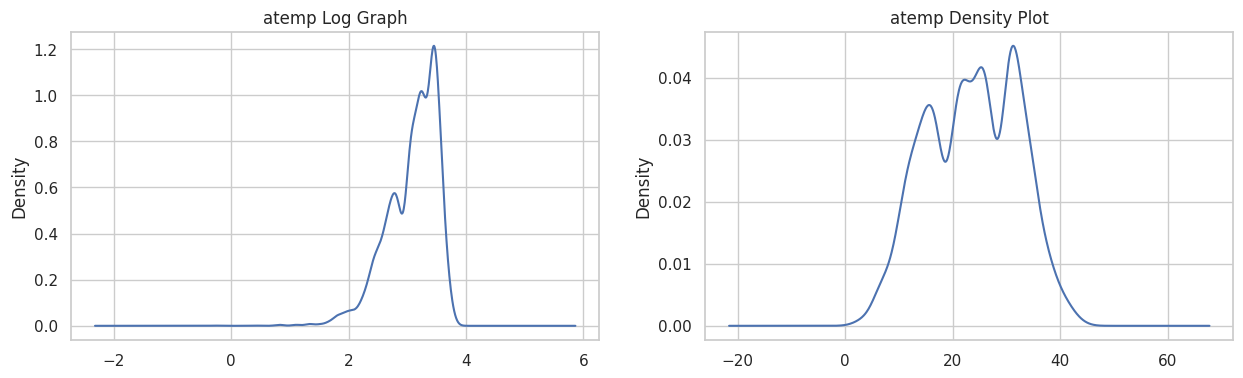

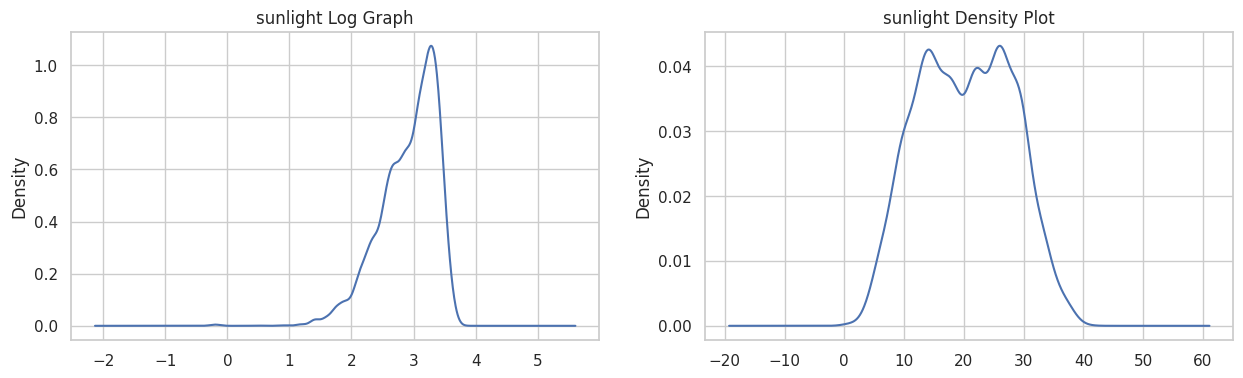

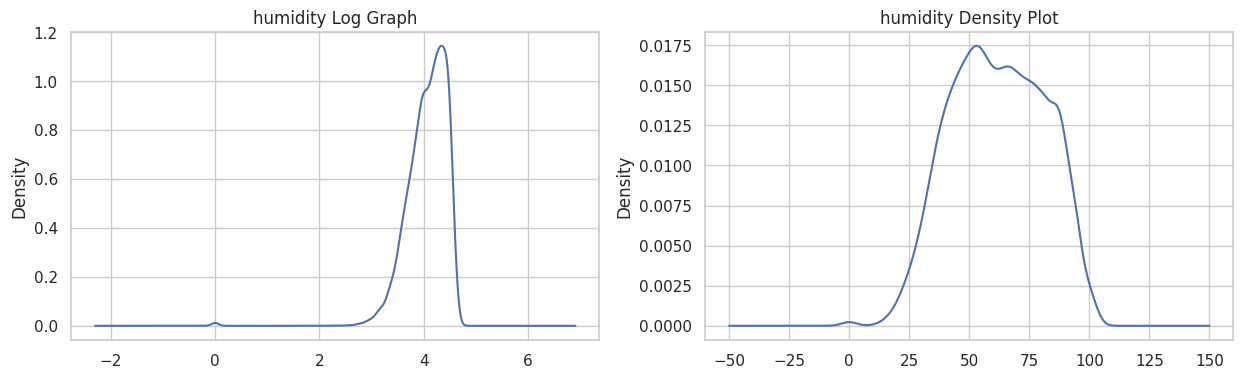

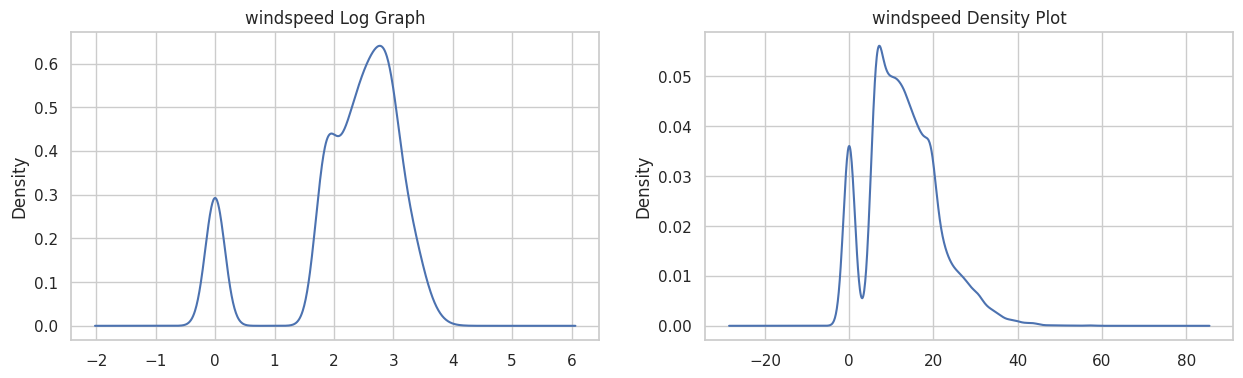

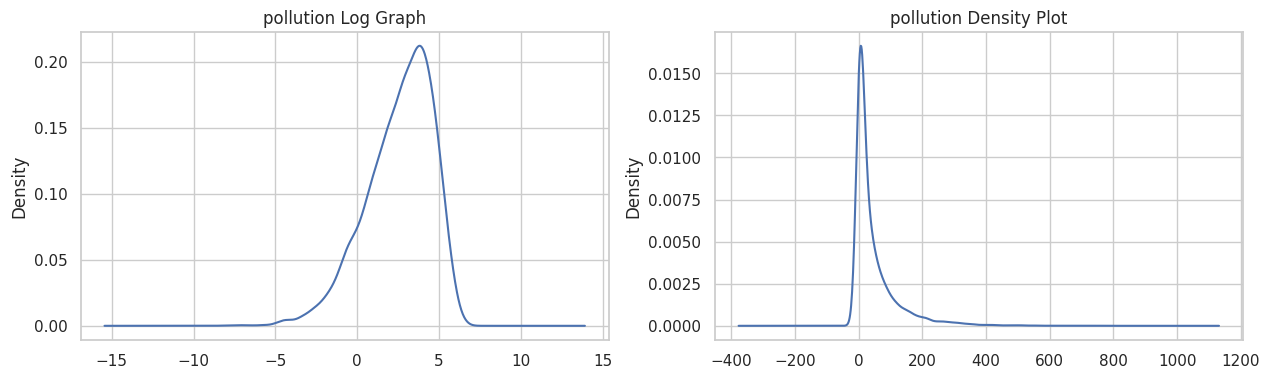

In [ ]:
cont_variables = ['temp', 'atemp', 'sunlight', 'humidity', 'windspeed', 'pollution']

# This is to figure out which variables are worthy of ln


for feat in cont_variables:
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    curr = np.log(X_train[feat].replace(0, 1))
    curr.plot.density(ax=axes[0])

    df[feat].plot.density(ax=axes[1])

    axes[0].set_title(feat + " Log Graph")
    axes[1].set_title(feat + " Density Plot")

    plt.show()

def split_dates(df, col):
    df = df.copy()
    df['datetime_obj'] = pd.to_datetime(df[col])
    df['year'] = df['datetime_obj'].dt.year
    df['month'] = df['datetime_obj'].dt.month
    df['day'] = df['datetime_obj'].dt.day
    df['hour'] = df['datetime_obj'].dt.hour
    df['weekday'] = df['datetime_obj'].dt.weekday
    df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    df['seconds_from_midnight'] = df['datetime_obj'].dt.hour * 3600 + df['datetime_obj'].dt.minute * 60 + df['datetime_obj'].dt.second
    df.drop([col, 'datetime_obj'], axis=1, inplace=True)
    return df

def ln_transform(df, to_ln):
    df = df.copy()
    for feat in to_ln:
        df[feat] = np.log(df[feat].replace(0, 1))
    return df

to_ln = ['temp', 'atemp', 'sunlight', 'humidity', 'windspeed', 'pollution']


We tried do check how log will affect the distribution of the continous features. As we can see, only 'pollution' will benefit from it.  

After exploring the feature 'traffic' we decided to entirly drop it because it has very low correlation with the label 'count' that we want to predict. Moreover, it's values distribute equally and does not have a meaning that can help us improving our model or predict the final results.

In [ ]:
to_ln = ['pollution']
same_cols = ['temp', 'atemp', 'sunlight']

def process(df, interactions, to_encode, is_test=False):
    df_copy = df.copy()
    df_copy = ln_transform(df_copy, to_ln)
    df_copy.drop(['traffic', 'atemp', 'sunlight'], axis=1, inplace=True)
    print(df_copy.shape)
    df_copy = encode_data(df=df_copy, to_encode=to_encode, is_test=is_test)

    df_copy = set_interactions(df_copy, interactions)
    df_copy = split_dates(df_copy, 'datetime')

    return df_copy


Removing outliers using the functions we defined above

We will for a second combine the X_train and the Y_train in order to remove outliers so we won't have to deal with issues that can pop up.

In [ ]:
temp = pd.concat([X_train, Y_train], axis=1)
for func in [remove_weather_outliers, remove_humidity_outlier, remove_windspeed_outlier, remove_pollution_outliers]:
    temp, count = func(temp)

X_train = temp.drop(['count'], axis=1)
Y_train = temp['count']

Number of weather samples above 3: 1
Number of humidity samples below 10: 13
Number of windspeed samples above 50: 3
Number of pollution samples above 500: 17


In order to avoid losing track fo what we do and which processing parts were done, we combine all the pre proccessing to one function.

In [ ]:
encoded_vars = ['season', 'weather']
strong_interactions = [('season_3', 'temp'), ('season_2', 'windspeed'), ('season_4', 'holiday'),('workingday', 'temp'), ('holiday', 'temp')]

X_train = process(df=X_train, interactions=strong_interactions, to_encode=encoded_vars)
X_validation = process(df=X_validation, interactions=strong_interactions, to_encode=encoded_vars, is_test=True)

# The fucntion we use is using "is_test" variable in order to distinguish between train and test and fit only the train data

(6497, 9)
(1633, 9)


#Training models

## Which models do we pick?

We chose the 3 models that are tree based because we dealt tabular data, and those models also work with a max_features parameter, meaning it helps us deal with issues regarding dimensionality (especially after adding features such as interactions).

Another pro of the tree based models, is since it based on splits, it could help us with further feature engineering since the information of each split, is affected by the previous split.

And since we are working with tree based models, it gives us more context when it comes to performence evalutaion, meaning looking at the difference between a single tree, a random forest and XGBoost.

In [ ]:
## Function to let us evaluate time of training
import time
def fit_with_time(estimator, x, y):
  start_time = time.time()
  estimator.fit(x,y)
  time_passed = time.time() - start_time
  print(f"Time Duration: {time_passed} seconds")
  return time_passed

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
best_params = {'max_depth': None, 'max_features': 0.5}

rf_cv = GridSearchCV(estimator=rf_reg,
                          param_grid={'max_depth' : [5, 10, None],
                                      'max_features': ['sqrt', 'log2', 0.5]},
                          scoring='neg_mean_squared_error',
                          cv=5, verbose=3)

rf_cv.fit(X_train, Y_train.values.ravel())
#{'max_depth': None, 'max_features': 0.5}

print(rf_cv.best_params_)
print(rf_cv.best_score_)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=5, max_features=sqrt;, score=-11952.926 total time=   3.6s
[CV 2/5] END max_depth=5, max_features=sqrt;, score=-12243.555 total time=   4.0s
[CV 3/5] END max_depth=5, max_features=sqrt;, score=-11319.734 total time=   3.4s
[CV 4/5] END max_depth=5, max_features=sqrt;, score=-10273.424 total time=   3.3s
[CV 5/5] END max_depth=5, max_features=sqrt;, score=-12046.529 total time=   3.6s
[CV 1/5] END max_depth=5, max_features=log2;, score=-11952.926 total time=   3.8s
[CV 2/5] END max_depth=5, max_features=log2;, score=-12243.555 total time=   3.3s
[CV 3/5] END max_depth=5, max_features=log2;, score=-11319.734 total time=   3.4s
[CV 4/5] END max_depth=5, max_features=log2;, score=-10273.424 total time=   4.1s
[CV 5/5] END max_depth=5, max_features=log2;, score=-12046.529 total time=   3.4s
[CV 1/5] END max_depth=5, max_features=0.5;, score=-10403.148 total time=   6.7s
[CV 2/5] END max_depth=5, max_features=

In [ ]:
rf_fit_time = fit_with_time(rf_cv.best_estimator_, X_train, Y_train)

Time Duration: 23.741397619247437 seconds


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(random_state=42)
dt_cv = GridSearchCV(estimator=dt,
                          param_grid={'max_features': ['sqrt', 'log2', 1/3],
                                      'max_depth' : [1, 3, 5, None]},
                          scoring='neg_mean_squared_error',
                          cv=3,
                          verbose=3)
dt_cv.fit(X_train, Y_train.values.ravel())
#{'max_depth': None, 'max_features': 0.3333333333333333}
print(dt_cv.best_params_)
print(dt_cv.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=1, max_features=sqrt;, score=-23020.653 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt;, score=-20799.112 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt;, score=-21760.521 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2;, score=-23020.653 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2;, score=-20799.112 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2;, score=-21760.521 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=0.3333333333333333;, score=-23020.653 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=0.3333333333333333;, score=-20799.112 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=0.3333333333333333;, score=-21760.521 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt;, score=-17044.559 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt;, score=-14743.657 total time=   

In [ ]:
dt_fit_time = fit_with_time(dt_cv.best_estimator_, X_train, Y_train)

Time Duration: 0.029005765914916992 seconds


In [ ]:
from xgboost import XGBRegressor

xg = XGBRegressor(eval_metric='rmse')
params = {'colsample_bylevel': [0.9], 'colsample_bynode': [0.9], 'colsample_bytree': [0.5],
          'learning_rate': [0.1], 'max_depth': [7], 'n_estimators': [200], 'reg_lambda': [0.9]}



xg_cv = GridSearchCV(estimator = xg,
                     param_grid = params,
                     scoring = 'neg_mean_squared_error',
                     cv=3)
# We gound the right parameters after this grid searrch (its in a comment so we won't waste more time)

# xg_cv = GridSearchCV(estimator=xg,
#                           param_grid ={'n_estimators' : [50, 100, 150, 200], 'learning_rate' : [0.001, 0.01, 0.1, 0.5],
#                                       'max_depth' : [1, 3, 5,  7, 10],
#                                       'colsample_bytree' : [0.5, 0.7, 0.2, .9],
#                                       'colsample_bylevel': [0.5, 0.7, 0.2, .9],
#                                       'colsample_bynode': [0.5, 0.7, 0.2, .9],
#                                       'reg_lambda' : [0.2, 0.5, 1, .9]},
#                           scoring='neg_mean_squared_error',
#                           cv=3)
xg_cv.fit(X_train, Y_train.values.ravel())

print(xg_cv.best_params_)
print(xg_cv.best_score_)


{'colsample_bylevel': 0.9, 'colsample_bynode': 0.9, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 0.9}
-1949.1978327627894


In [ ]:
xg_fit_time = fit_with_time(xg_cv.best_estimator_, X_train, Y_train)

Time Duration: 0.37236785888671875 seconds


## Model Estimation

We will add some functions to allow us to estimate mean rmse and the rmse standard deviation

In [ ]:
def cv_estimation(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_rmses = np.zeros(k)
    i = 0 # running index
    for train_idx, test_idx in kf.split(y):
        train_y, val_y = y[train_idx], y[test_idx]
        train_x, val_x = X.iloc[train_idx, :], X.iloc[test_idx, :]
        model.fit(train_x, train_y)
        val_pred = model.predict(val_x)
        mse = np.sqrt(mean_squared_error(val_y, val_pred))
        fold_rmses[i] = mse
        i+=1
    model.fit(X, y) #reset the fitting
    return fold_rmses.mean(), fold_rmses.std()

def model_analysis(models, X, y, k):
    '''
    Gets a list of models, returns a dictionary for each model name, and a tuples for each model for the following format (RMSE, SD - of rmses of all folds)
    Parameters:
    models: a list of model dictionaries of name and model NOTE: put a list of dictionaries with the follwing format {"name" : str , "estimator" : estimator}
    X: the "train" dataset without the label (or count)
    y: the count vector
    k: amount of folds
    '''
    performence_dict = {}
    for model in models:
        mean_rmse, rmse_sd = cv_estimation(model['estimator'], X, y, k)
        performence_dict[model['name']] = (mean_rmse, rmse_sd)
    means = []
    sds = []
    names = []
    for name in performence_dict.keys():
        names.append(name)
        curr_mean, curr_sd = performence_dict[name]
        means.append(curr_mean)
        sds.append(curr_sd)

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Bar plot for means
    axs[0].bar(names, means, color='blue', alpha=0.7, label='Mean RMSE')
    axs[0].set_ylabel('Mean RMSE')
    axs[0].legend()

    # Bar plot for standard deviations
    axs[1].bar(names, sds, color='orange', alpha=0.7, label='SD of RMSE')
    axs[1].set_xlabel('Model Names')
    axs[1].set_ylabel('SD of RMSE')
    axs[1].legend()

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Display the plot
    plt.show()

    return performence_dict

In [ ]:
models = [{'name' : 'Random_Forest', 'estimator' : rf_cv.best_estimator_},
          {'name' : 'XGBoost', 'estimator' : xg_cv.best_estimator_},
          {'name' : 'Decision Tree', 'estimator' : dt_cv.best_estimator_}]

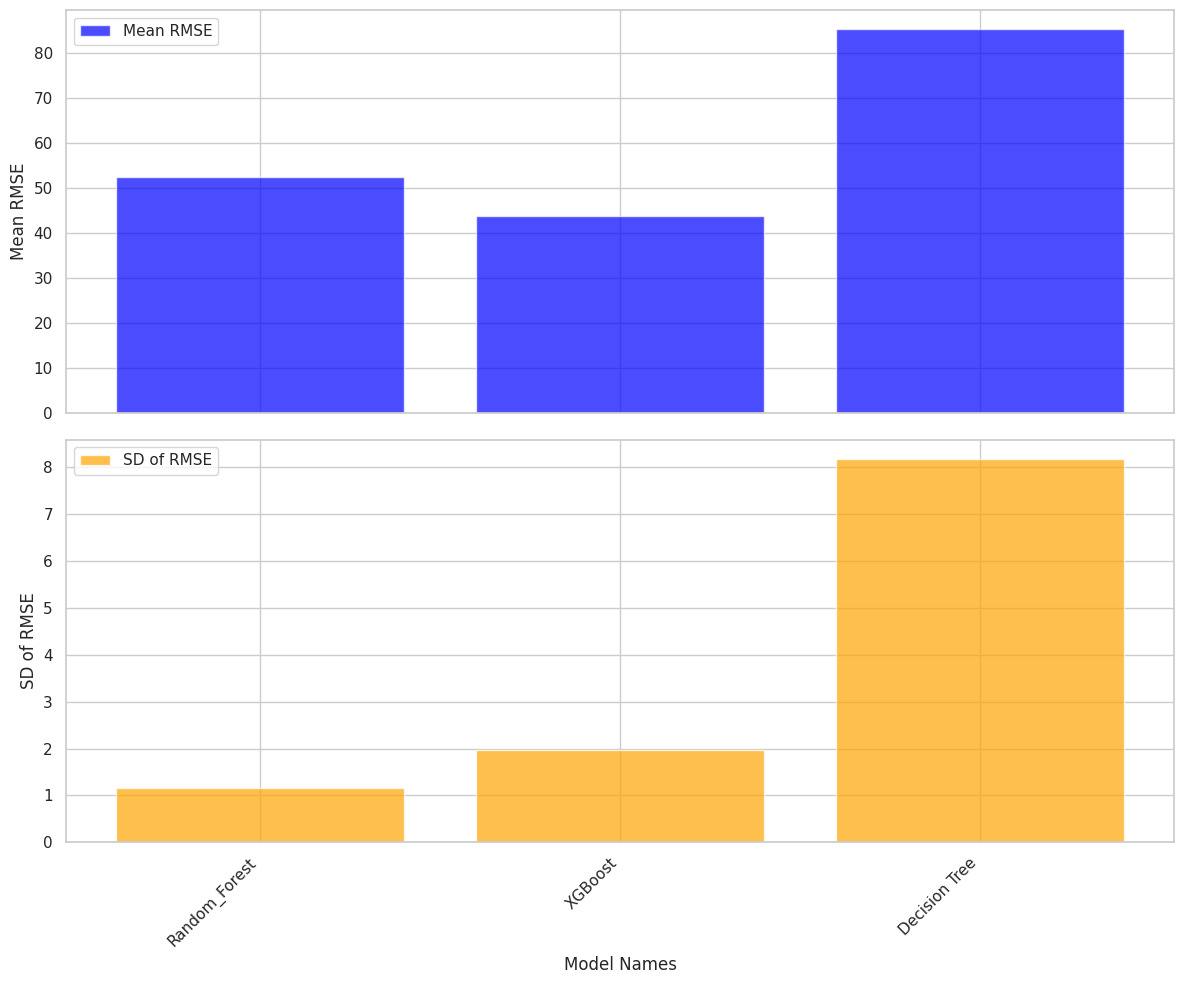

{'Random_Forest': (52.44892671303241, 1.1569081582593912),
 'XGBoost': (43.65124176495141, 1.9620407240611908),
 'Decision Tree': (85.32221847488516, 8.182562684766784)}

In [ ]:
model_analysis(models, X_train, Y_train.values.ravel(), 5)

We see that the "best" model considering both performence and stability is the XGBoost regressor.

It makes sence since it uses gradient boosting it can handle non linear relationships between features.

In [ ]:
train_columns_order = X_train.columns ## THIS TO HELP US WITH FEATURE NAMES MISMATCH

X_validation = X_validation[train_columns_order]


In [ ]:
dt_val_pred = dt_cv.predict(X_validation)

rmse = np.sqrt(mean_squared_error(Y_validation, dt_val_pred))

print("Validation RMSE for Decision Tree:", rmse)

Validation RMSE for Decision Tree: 72.32445436590858


In [ ]:
rf_val_pred = rf_cv.predict(X_validation)

rmse = np.sqrt(mean_squared_error(Y_validation, rf_val_pred))

print("Validation RMSE for Random Forest:", rmse)

Validation RMSE for Random Forest: 51.33826754462172


In [ ]:
xg_val_pred = xg_cv.predict(X_validation)

rmse = np.sqrt(mean_squared_error(Y_validation, xg_val_pred))

print("Validation RMSE for XGBoost:", rmse)

Validation RMSE for XGBoost: 41.31401453796334


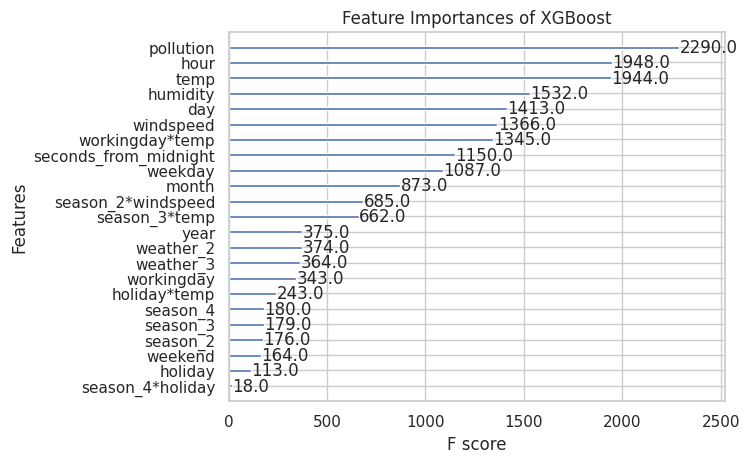

In [ ]:
from xgboost import plot_importance
plot_importance(xg_cv.best_estimator_)
plt.title("Feature Importances of XGBoost")
plt.show()

###What do learn from the XGBoost feature importance?

first of all, the new features we added were relevant! also we can see features poluution and temp effects on the bike renting, which is not surprising since we would expect such as outside conditions to be relevant to it, what is nice to se how there is a difference from the interactions such as season, and working day or even holiday (a nicer day during the holiday makes us want to go outside and ride a bike)

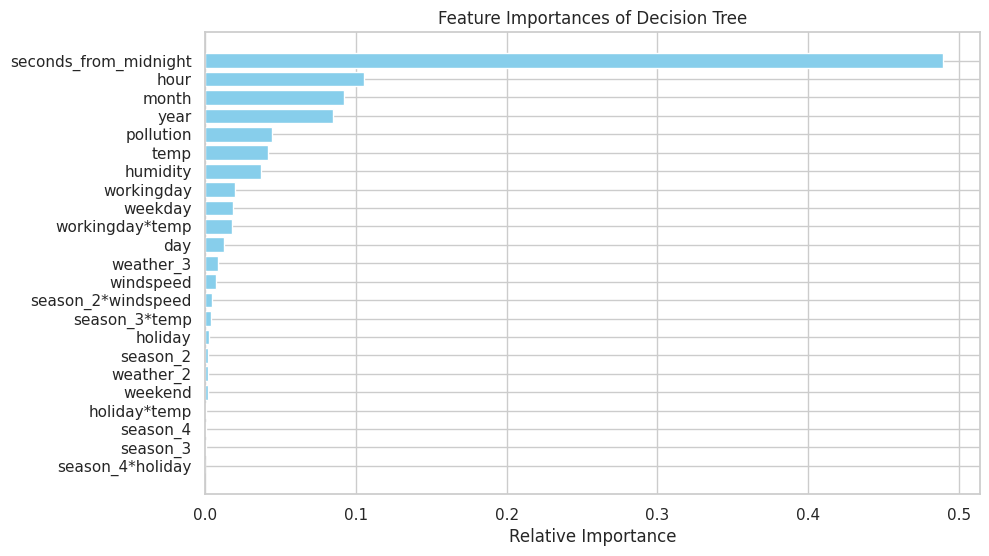

In [ ]:
### Feature importance for random forest
dt_reg = dt_cv.best_estimator_
# Get feature importances
importances = dt_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Decision Tree")
plt.barh(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Here it is similar to the XGboost, but there is more a focus on time during the day, which could be a result of the fact that there are hours with more sunlight, or that are nicer outside.

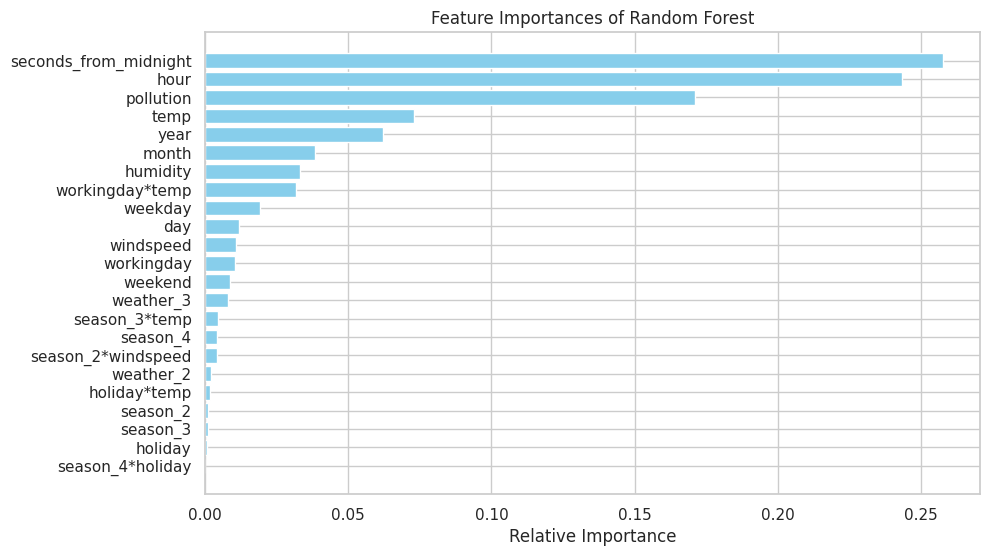

In [ ]:
### Feature importance for random forest
rf_reg = rf_cv.best_estimator_
# Get feature importances
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Random Forest")
plt.barh(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Here during the random forest we see the same thing as above.

See how our best model compares to the test:

In [ ]:
train_columns_order = X_train.columns ## THIS TO HELP US WITH FEATURE NAMES MISMATCH

X_test = test_df_temp.drop(['count'], axis=1)
Y_test = test_df_temp['count']

X_test = process(df=X_test, interactions=strong_interactions, to_encode=encoded_vars, is_test=True)
X_test = X_test[X_train.columns]


(2722, 9)


In [ ]:
xg_test_pred = xg_cv.predict(X_test)
start = time.time()

xg_rmse = np.sqrt(mean_squared_error(Y_test, xg_test_pred))
end = time.time()

xg_pred_time = end - start

print("XGBoost Test RMSE:", xg_rmse)
print("XGBoost prediction time:", xg_pred_time ,'Seconds')

XGBoost Test RMSE: 38.73673030688302
XGBoost prediction time: 0.0007886886596679688 Seconds


In [ ]:
rf_test_pred = rf_cv.predict(X_test)
start = time.time()

rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_test_pred))
end = time.time()

rf_pred_time = end-start
print("RF prediction time:", rf_pred_time , 'Seconds')
print("RandomForest Test RMSE:", rf_rmse)

RF prediction time: 0.0007207393646240234 Seconds
RandomForest Test RMSE: 46.54178740314608


In [ ]:
dt_test_pred = dt_cv.predict(X_test)
start = time.time()

dt_rmse = np.sqrt(mean_squared_error(Y_test, dt_test_pred))
end = time.time()

dt_pred_time = end-start

print("DT prediction time:", dt_pred_time , 'Seconds')
print("Decision Tree Test RMSE:", dt_rmse)

DT prediction time: 0.0008420944213867188 Seconds
Decision Tree Test RMSE: 71.99973467172926


In [ ]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'pollution',
       'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'season_3*temp', 'season_2*windspeed', 'season_4*holiday',
       'workingday*temp', 'holiday*temp', 'year', 'month', 'day', 'hour',
       'weekday', 'weekend', 'seconds_from_midnight'],
      dtype='object')

In [ ]:
#### this to get the interactions

interactions = []
for c in X_train.columns:
  if '*' in c:
    interactions.append(c)

times = ['year', 'month', 'day', 'hour',
       'weekday', 'weekend', 'seconds_from_midnight']

encoded = ['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',]

In [ ]:

results = {'model': ['Decision Tree', 'Random Forest', 'XGBoost'],
           'Score (RMSE)': [str(dt_rmse), str(rf_rmse), str(xg_rmse)],
           'Hyperparams used': [list(dt_cv.best_params_.items()),list( rf_cv.best_params_.items()), list(xg_cv.best_params_.items())],
           'Features dropped': [['traffic', 'atemp', 'sunlight', 'datetime', 'weather', 'season'], ['traffic', 'atemp', 'sunlight', 'datetime', 'weather', 'season'], ['traffic', 'atemp', 'sunlight', 'datetime', 'weather', 'season']],
           'New features created': [interactions+times+encoded, interactions+times+encoded, interactions+times+encoded],
           'Runtime trainining + inference (seconds)': [int(dt_fit_time+dt_pred_time), int(rf_fit_time + rf_pred_time), int(xg_fit_time+xg_pred_time)],
           'Hardware used (GPU/CPU/TPU)': ['CPU', 'CPU', 'CPU'],
           'Explainability (top 3 features)': [['seconds_from_midnight', 'hour', 'month'], ['seconds_from_midnight', 'hour', 'pollution'], ['pollution', 'hour', 'temp']]
           }



res = pd.DataFrame(results)

import os
res.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))



In [ ]:
res.head()


,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Decision Tree,71.99973467172926,"[(max_depth, None), (max_features, 0.333333333...","[traffic, atemp, sunlight, datetime, weather, ...","[season_3*temp, season_2*windspeed, season_4*h...",0,CPU,"[seconds_from_midnight, hour, month]"
1,Random Forest,46.54178740314608,"[(max_depth, None), (max_features, 0.5)]","[traffic, atemp, sunlight, datetime, weather, ...","[season_3*temp, season_2*windspeed, season_4*h...",23,CPU,"[seconds_from_midnight, hour, pollution]"
2,XGBoost,38.73673030688302,"[(colsample_bylevel, 0.9), (colsample_bynode, ...","[traffic, atemp, sunlight, datetime, weather, ...","[season_3*temp, season_2*windspeed, season_4*h...",0,CPU,"[pollution, hour, temp]"
